<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden">Machine Learning-Based Breast Cancer Diagnosis</div>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden">1 | Objective</div>

This project aims to develop a machine learning-based predictive model to classify breast tumors as malignant or benign using features extracted from fine needle aspirate (FNA) images of breast masses. By leveraging advanced machine learning techniques, we aim to provide a fast, accurate, and non-invasive diagnostic tool that can assist healthcare professionals in making informed decisions.

My goal is to compare multiple classifiers, evaluate their performance, and identify the most effective model. Ultimately, this model could be integrated into a clinical decision support system, enhancing early diagnosis and potentially improving survival rates.

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden">2 | Data Description</div>

The dataset used in this study is the Breast Cancer Wisconsin (Diagnostic) dataset, which is publicly available through the UCI Machine Learning Repository. 

Data can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

The dataset contains 569 samples of breast tumor cases (Class distribution: 357 benign, 212 malignant), each described by 30 numerical features derived from FNA images of cell nuclei.

**Dataset Attributes**

- Target Variable:

Diagnosis: Labels whether the tumor is Malignant (M) or Benign (B).

- Predictor Features:
  
The dataset includes 30 continuous numerical features, grouped into three categories:

1. Mean values (e.g., radius_mean, texture_mean)
2. Standard error values (e.g., radius_se, texture_se)
3. Worst or largest values (e.g., radius_worst, texture_worst)

These features describe morphological properties of the cell nuclei, such as:

- Radius: Mean distance from the center to perimeter points.
- Texture: Standard deviation of grayscale values.
- Perimeter & Area: Measurements of cell size.
- Smoothness & Compactness: Measures of cell boundary regularity.
- Concavity & Concave Points: Degree of concave portions in the cell boundary.
- Symmetry: Symmetry of the nucleus shape.
- Fractal Dimension: Complexity of the cell’s shape.
  
**Dataset Summary**

- Number of Samples: 569
- Number of Features: 30
- Class Distribution:
357 Benign (63%)
212 Malignant (37%)
- Missing Values: None

CITE: Wolberg, W., Mangasarian, O., Street, N., & Street, W. (1993). Breast Cancer Wisconsin (Diagnostic) [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden">3 | Importing the Libraries</div>

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, validation_curve, KFold
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
import joblib
# 

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden">4 | Importing the Data</div>

In [132]:
# Define the column names
column_names = [
    'id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
    'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
    'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst',
    'fractal_dimension_worst'
]

# Load the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
data = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the dataframe
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden">5 | Exploratory Data Analysis (EDA) + Data cleaning</div>

C:\Users\fsgol\AppData\Local\Temp\ipykernel_4844\3419777784.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['diagnosis'] = data['diagnosis'].replace(to_replace='M', value=1)


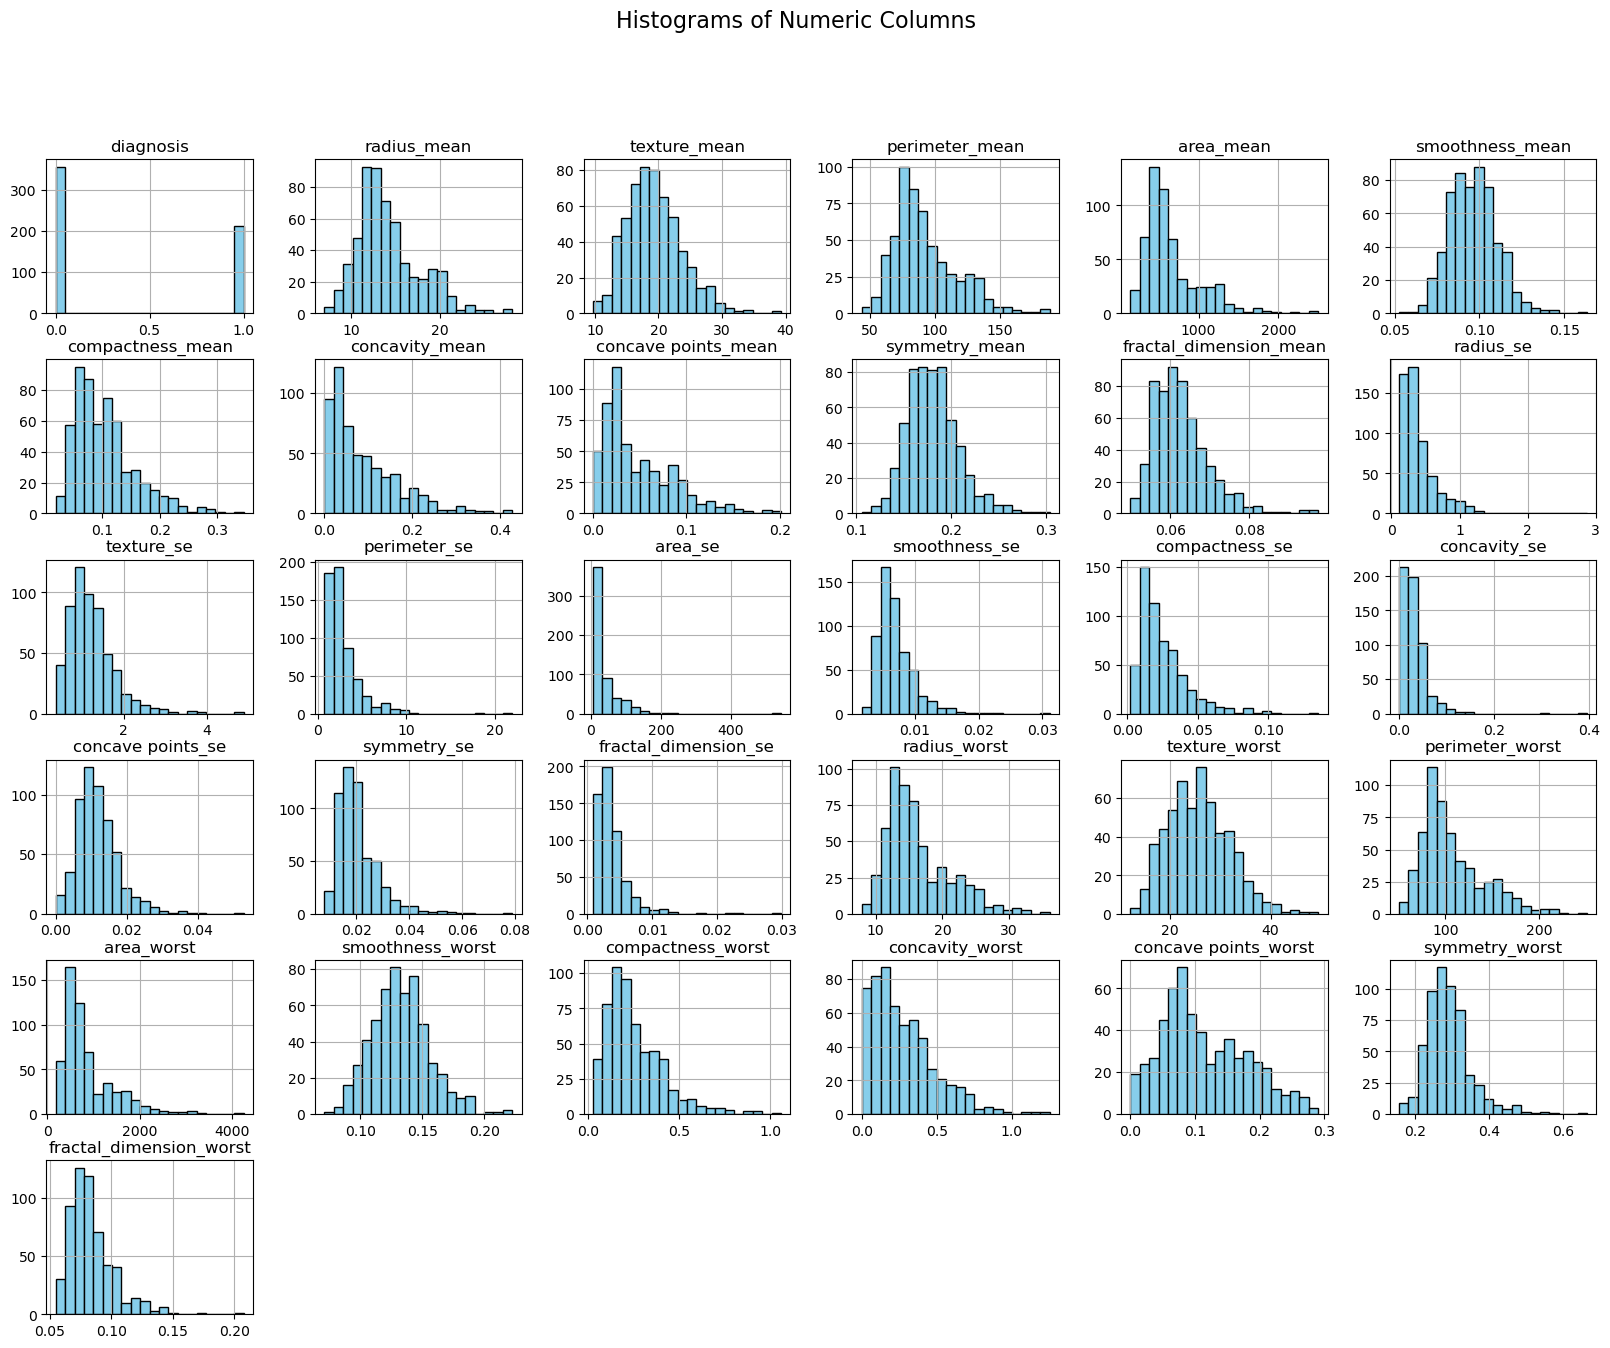

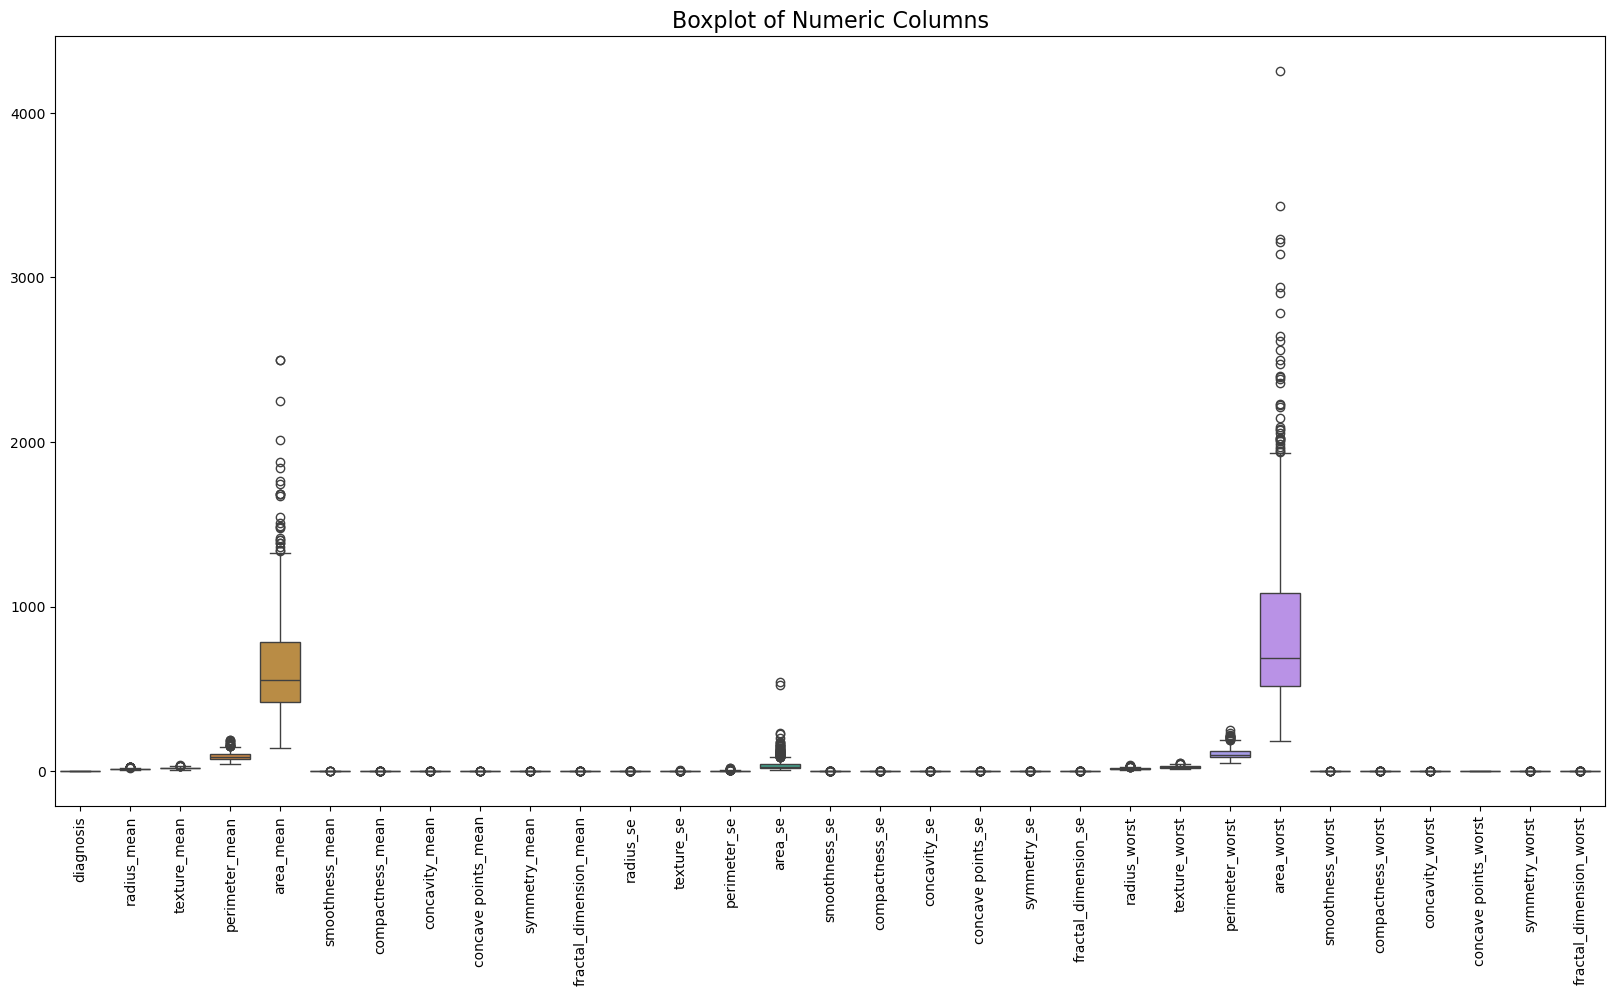

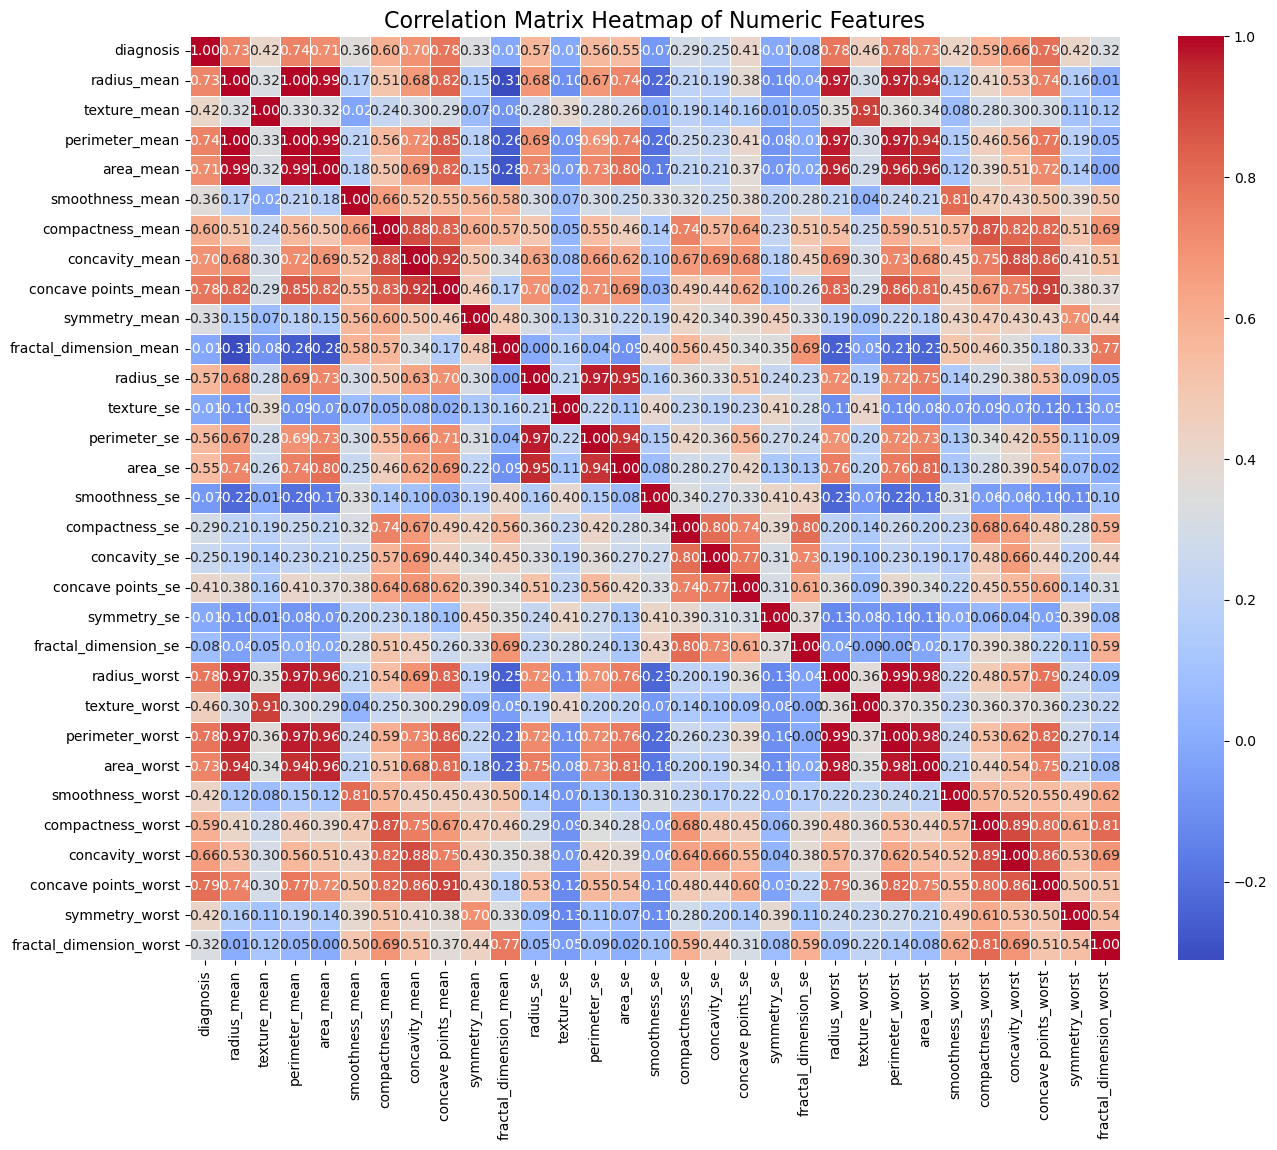

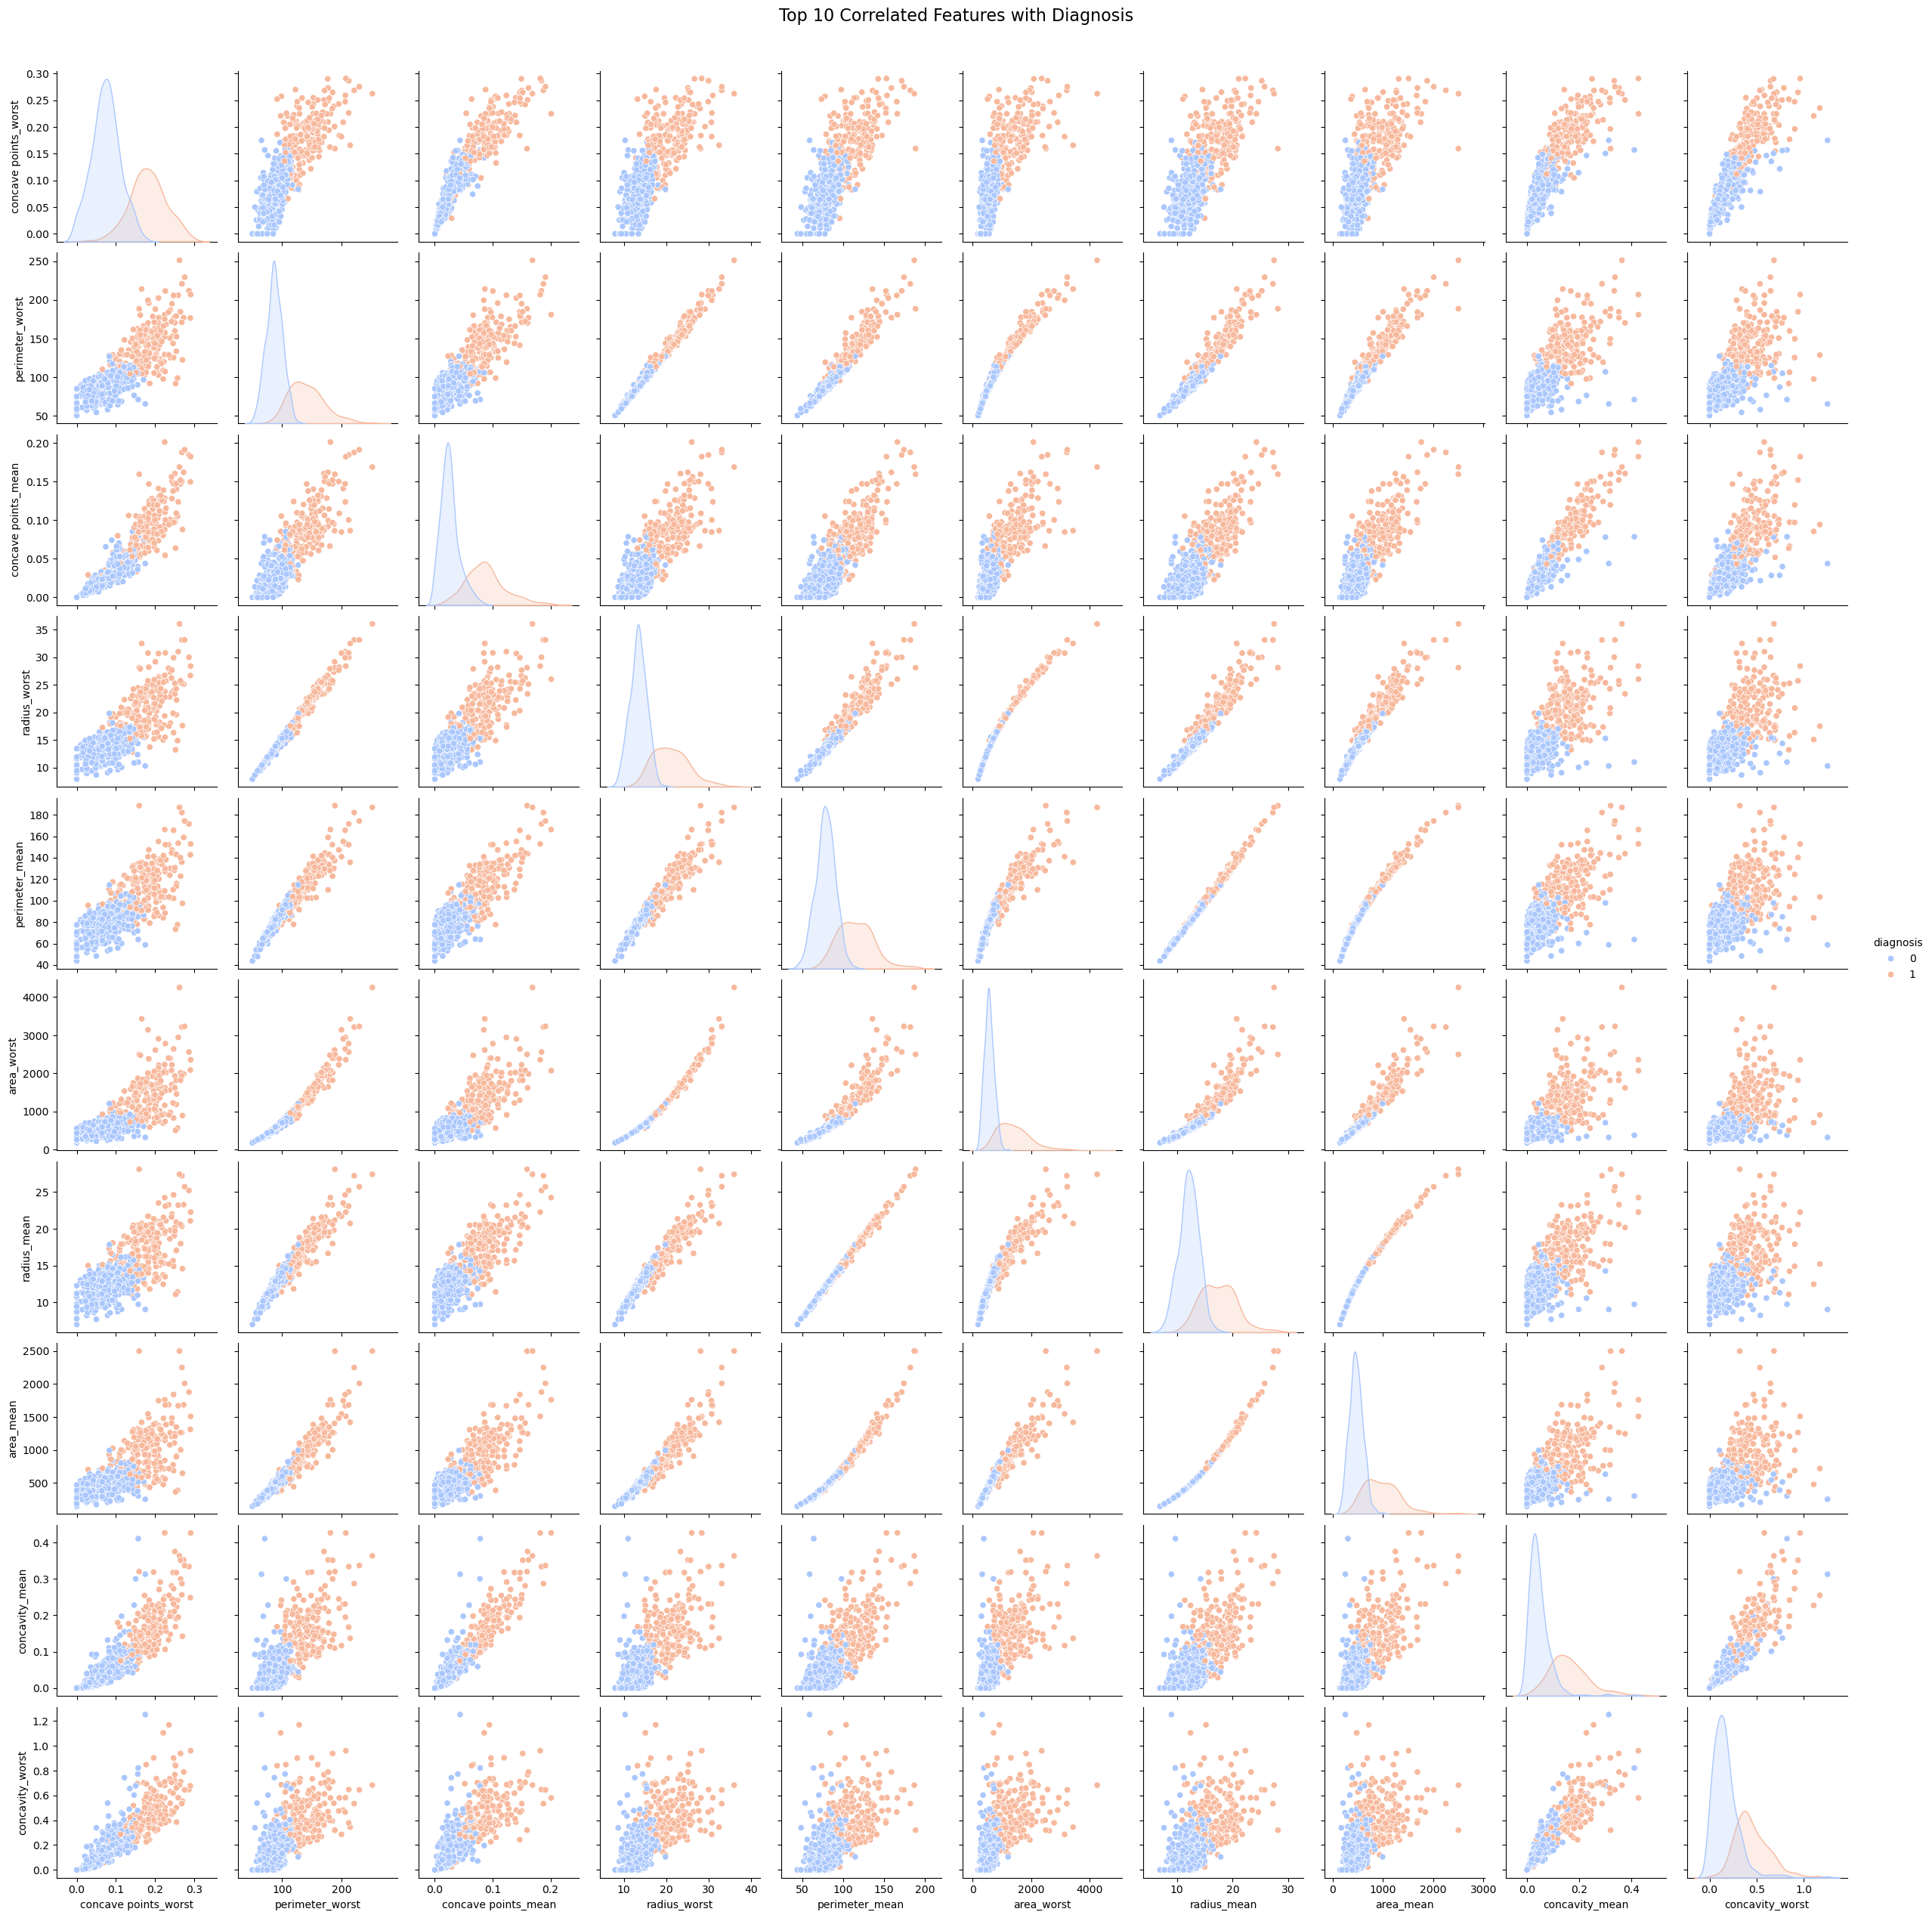

Correlation Matrix:
                         diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_s

In [133]:
# Function to generate a summary of column names, data types, missing values, and other key statistics for a given DataFrame, including skewness, kurtosis, and correlation matrix.
# 
# Ensure the 'diagnosis' column is processed
if 'id' in data.columns:
    data.drop('id', axis=1, inplace=True)
if 'Unnamed: 32' in data.columns:
    data.drop('Unnamed: 32', axis=1, inplace=True)

# Target Encoding (converting categorical Target to numeric)
data['diagnosis'] = data['diagnosis'].replace(to_replace='B', value=0)
data['diagnosis'] = data['diagnosis'].replace(to_replace='M', value=1)

def dataset_summary(df, top_n=3, plot=True):
    """
    Generate a summary of column names, data types, missing values, 
    and other key statistics for a given DataFrame, including skewness, kurtosis, and correlation matrix.
    
    Args:
    - df: The input DataFrame.
    - top_n: Number of top features to visualize correlated with 'diagnosis'.
    - plot: Whether to plot the visualizations or not.
    
    Returns:
    - summary: A DataFrame containing column summary statistics.
    - corr_matrix: A correlation matrix of numeric features.
    """
    # Summary DataFrame with basic column statistics
    summary = pd.DataFrame({
        'Column_Name': df.columns,
        'Data_Type': df.dtypes,
        'NA_Values': df.isna().sum(),
        'Non_Null_Count': df.notna().sum(),
        'Unique_Values': df.nunique(),
    })

    # Calculate skewness, kurtosis, and IQR for numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    summary['Skewness'] = df[numeric_cols].apply(lambda x: x.skew())
    summary['Kurtosis'] = df[numeric_cols].apply(lambda x: x.kurt())
    summary['IQR'] = df[numeric_cols].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))

    # Generate Correlation Matrix for numeric columns
    corr_matrix = df[numeric_cols].corr()

    # Visualization
    if plot:
        # Histograms of numeric columns
        df[numeric_cols].hist(bins=20, figsize=(20, 15), color='skyblue', edgecolor='black')
        plt.suptitle('Histograms of Numeric Columns', fontsize=16)
        plt.show()

        # Boxplots of numeric columns
        plt.figure(figsize=(20, 10))
        sns.boxplot(data=df[numeric_cols])
        plt.title('Boxplot of Numeric Columns', fontsize=16)
        plt.xticks(rotation=90)
        plt.show()

        # Correlation Heatmap
        plt.figure(figsize=(15, 12))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
        plt.title('Correlation Matrix Heatmap of Numeric Features', fontsize=16)
        plt.show()

        # Pairplot for top_n correlated features with the 'diagnosis' column
        if 'diagnosis' in df.columns:
            top_corr_features = corr_matrix['diagnosis'].abs().sort_values(ascending=False).index[1:top_n+1]
            sns.pairplot(df, vars=top_corr_features, hue='diagnosis', palette='coolwarm')
            plt.suptitle(f'Top {top_n} Correlated Features with Diagnosis', y=1.02, fontsize=16)
            plt.show()

    return summary, corr_matrix

# Example: Generate the summary for your dataset
# Ensure the 'diagnosis' column is present in the DataFrame
if 'diagnosis' in data.columns:
    summary_df, corr_matrix = dataset_summary(data, top_n=10, plot=True)
else:
    print("The 'diagnosis' column is not present in the DataFrame.")
print("Correlation Matrix:")
print(corr_matrix)
print("\nDataset Summary:")
print(summary_df)

In [134]:
data.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [135]:
def detect_and_delete_duplicated(df, only_info=False):
    """
    Simple function to show and delete duplicate entries in a DataFrame

    Parameters:
    - df: The DataFrame to erase duplicate entries.
    - only_info: If you only want to know how many duplicates are.

    Return:
    - df: The DataFrame cleaned.
    """
    duplicate_count = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicate_count}")
    return df.drop_duplicates() if not only_info else None
#
df = detect_and_delete_duplicated(data)
df.shape
#

Number of duplicate rows: 0


(569, 31)

In [136]:
# Function to split numerical and categorical columns in a dataframe.
# 
def split_numerical_categorical_cols(df):
    """
    Function to split numerical and categorical columns in a dataframe.

    Parameters:
    - df: The dataframe to analyze.

    Returns:
    - numerical_cols: List of numerical column names.
    - categorical_cols: List of categorical column names.
    """
    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
    categorical_cols = df.select_dtypes(exclude=['number']).columns.tolist()
    return numerical_cols, categorical_cols
#

In [137]:
# Function to find outliers in a select column, with a modifiable quantile and addition.
# 
def detect_outliers(df, column, quant=0.25, add=1.5):
    """
    Function to find outliers in a select column, with a modifiable quantile and addition.

    Parameters:
    - df: The DataFrame to analyze.
    - column: Column name to analyze.
    - quant (opt): set quantile.
    - add (opt): set addition to the superior and inferior limits calculation.

    Return:
    - Text indicating how many outlayers, in which column and their indexes.
    """

    # Calculate both quantiles, IQR
    Q3 = df[column].quantile(1-quant)
    Q1 = df[column].quantile(0+quant)
    IQR = Q3 - Q1

    # Calculate superior and inferior limits
    superior = Q3 + (add * IQR)
    inferior = Q1 - (add * IQR)
    out_sup = df[df[column] > superior].index
    out_inf = df[df[column] < inferior].index

    # Get outlayers and return the information
    outliers = list(set(out_sup).union(set(out_inf)))
    return (f'There are {len(outliers)} outlayers in the column {column} with the next indexs: {outliers}')  
# 

In [138]:
# Function to show initial information about the columns in the dataframe.
# 
def get_columns_info(df, get_outliers=False):
    """
    Function to show initial information about the columns in the dataframe.
    You will get the shape, total nulls and total nulls per column,
    and a summary of numerical and categorical vars separately.

    Parameters:
    - df: The dataframe to analyze.
    """

    # Show initial and basic information
    print('Shape -> ', df.shape)
    print('Null values (number) per column -> ', df.isnull().sum())

    # Get numerical and categorical columns, and create two separate dataframes
    numerical_cols, categorical_cols = split_numerical_categorical_cols(df)

    numerical_df = df[numerical_cols]
    numerical_summary = pd.DataFrame({
        'DataType': numerical_df.dtypes,
        'Min': numerical_df.min(),
        'Max': numerical_df.max(),
    })

    categorical_df = df[categorical_cols]
    categorical_summary = pd.DataFrame({
        'DataType': categorical_df.dtypes,
        'Unique': categorical_df.apply(lambda col: ', '.join(map(str, col.unique())))
    })

    # Print the information and returns
    print("\nNumerical Summary:", numerical_summary)
    print("\nCategorical Summary:", categorical_summary)
    
    if get_outliers:
        print("\nOutliers:\n")
        for col in numerical_cols: print(detect_outliers(data, col))
#

In [139]:
# Function to remove outliers in a select column, with a modifiable quantile and addition.
#
def remove_outliers(df, column, quant=0.25, add=1.5):
    Q3 = df[column].quantile(1-quant)
    Q1 = df[column].quantile(0+quant)
    IQR = Q3 - Q1

    # Define bounds
    superior = Q3 + (add * IQR)
    inferior = Q1 - (add * IQR)

    # Filter out outliers
    filtered_df = df[(df[column] <= superior) & (df[column] >= inferior)]
    return filtered_df
#

Number of class 0 samples (Benign): 357
Number of class 1 samples (Malign): 212


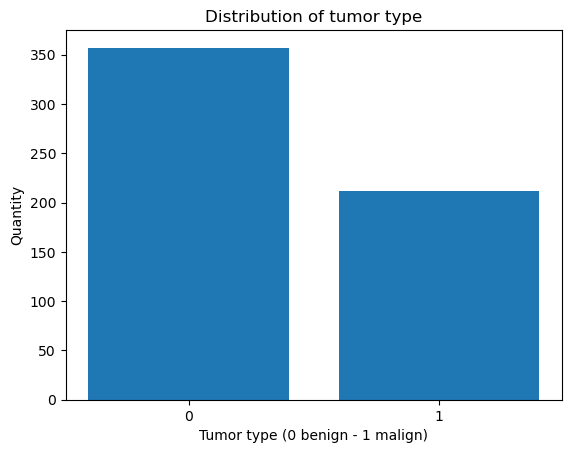

array([357, 212])

In [140]:
# Function to plot binary distribution.
# 
def plot_binary_distribution(target):
    unique, counts_uniques = np.unique(target, return_counts=True)
    print(f"Number of class 0 samples (Benign): {counts_uniques[0]}")
    print(f"Number of class 1 samples (Malign): {counts_uniques[1]}")

    plt.bar(unique, counts_uniques)
    plt.title("Distribution of tumor type")
    plt.xticks([0, 1])
    plt.xlabel("Tumor type (0 benign - 1 malign)")
    plt.ylabel("Quantity")
    plt.show()

    return counts_uniques
#
plot_binary_distribution(data['diagnosis'])
#

In [141]:
# Encoding the Target (converting categorical Target to numeric)
# 
data['diagnosis'] = data['diagnosis'].replace(to_replace='B', value = 0)
data['diagnosis'] = data['diagnosis'].replace(to_replace='M', value = 1)
#

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0

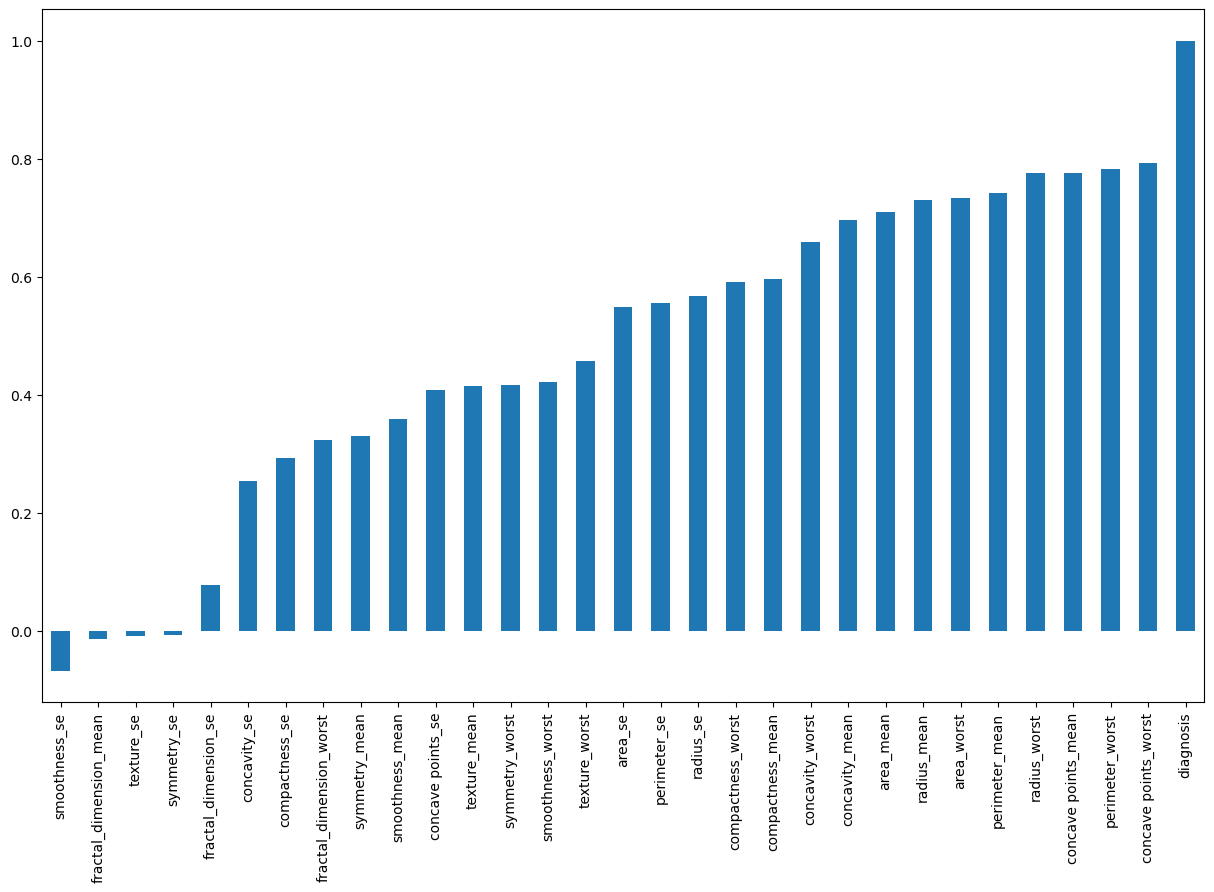

In [142]:
fig = plt.figure(figsize=(15,9))
data.corr()['diagnosis'].sort_values(ascending=True).plot(kind='bar')
print(data.corr()['diagnosis'].sort_values(ascending=True))
plt.show()

In [143]:
# Drop columns with correlation less than 0.3.
# 
temp_data = data.corr()['diagnosis'].sort_values(ascending=True)
temp_df = temp_data[temp_data < 0.3].index.tolist()
print(temp_df)
data.drop(temp_df, axis=1, inplace=True)

['smoothness_se', 'fractal_dimension_mean', 'texture_se', 'symmetry_se', 'fractal_dimension_se', 'concavity_se', 'compactness_se']


<Axes: >

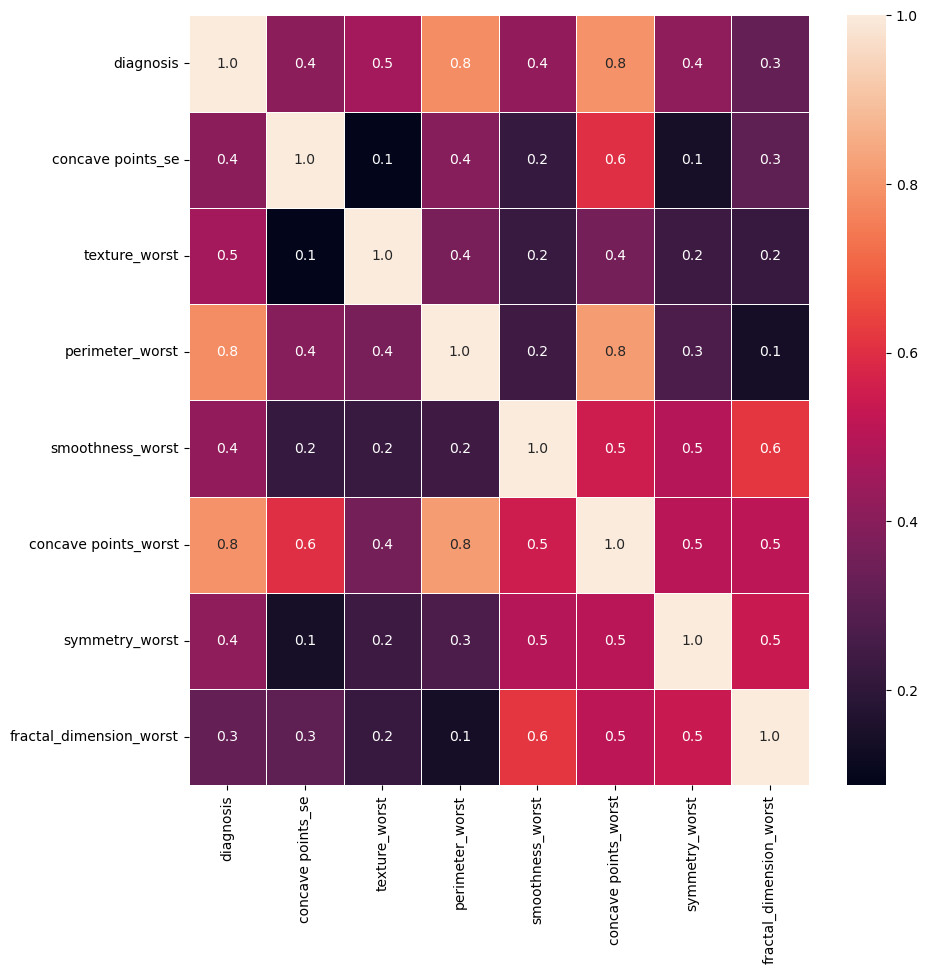

In [144]:
# Drop columns with no prediction value provided.
# 
columns_to_remove = ['concavity_worst', 'compactness_worst', 'concave points_mean', 'concavity_mean', 'compactness_mean', 'area_worst', 'radius_worst', 'radius_mean', 'perimeter_mean', 'area_mean', 'radius_se', 'perimeter_se', 'area_se', 'texture_mean', 'smoothness_mean', 'symmetry_mean']

data.drop(columns_to_remove, axis=1, inplace=True)

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

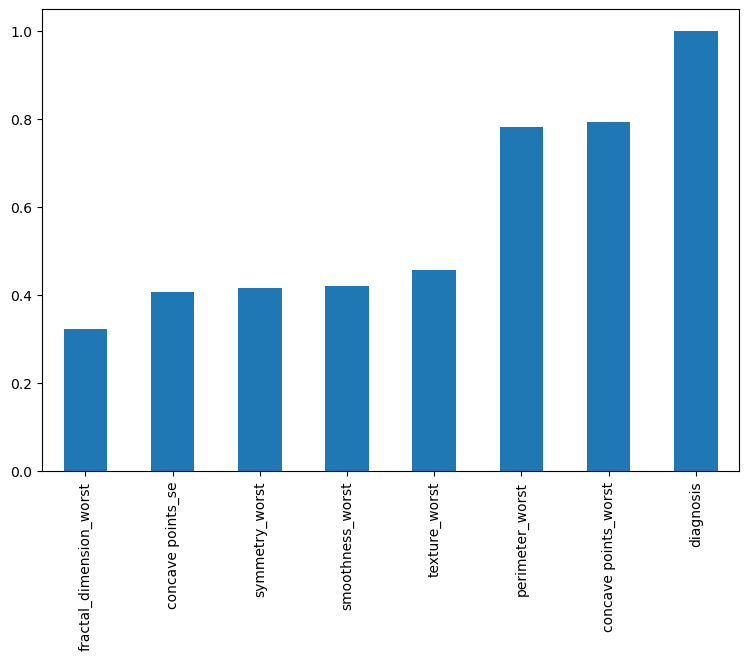

In [145]:
fig = plt.figure(figsize=(9,6))

data.corr()['diagnosis'].sort_values(ascending=True).plot(kind='bar')
plt.show()

<Figure size 1000x1000 with 0 Axes>

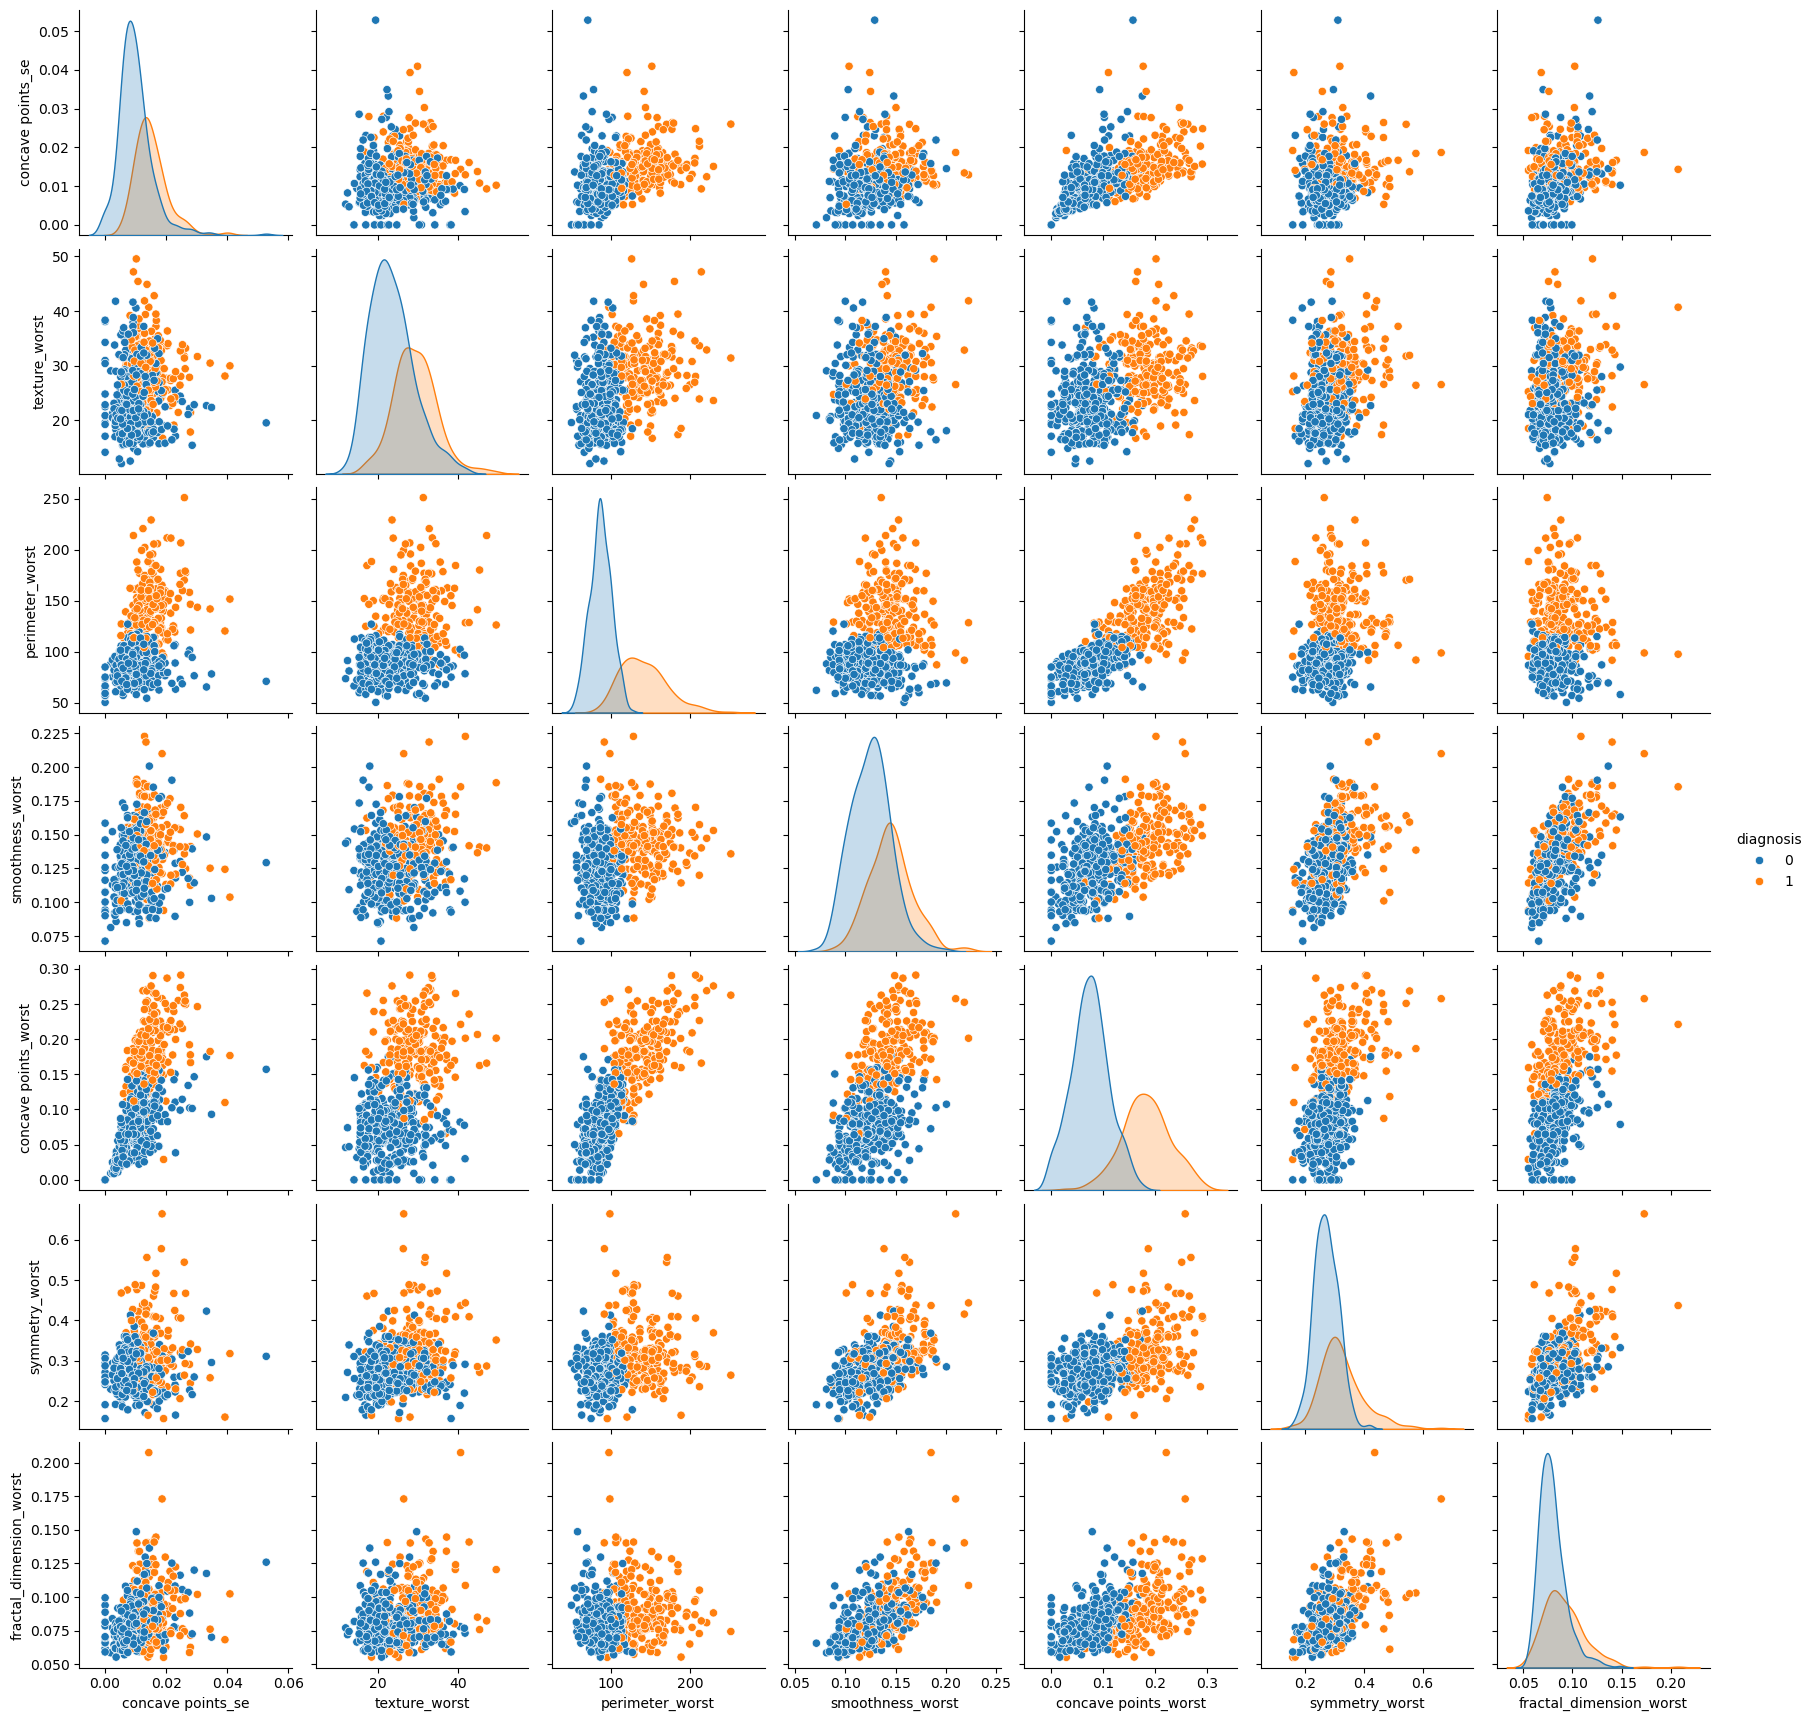

In [146]:
# Comparison between variables.
# 
fig = plt.figure(figsize=(10,10))
sns.pairplot(data, hue='diagnosis')
plt.show()

In [147]:
# Verify the remaining features.
# 
print(data.shape)
data.head()

(569, 8)


diagnosis  concave points_se  texture_worst  perimeter_worst  \
0          1            0.01587          17.33           184.60   
1          1            0.01340          23.41           158.80   
2          1            0.02058          25.53           152.50   
3          1            0.01867          26.50            98.87   
4          1            0.01885          16.67           152.20   

   smoothness_worst  concave points_worst  symmetry_worst  \
0            0.1622                0.2654          0.4601   
1            0.1238                0.1860          0.2750   
2            0.1444                0.2430          0.3613   
3            0.2098                0.2575          0.6638   
4            0.1374                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden">6 | Train-Test Split and Data Preprocessing</div>

- Define Target and Predictors
- Train-Test Split
- Data Preprocessing
  - Log Transformation
  - Feature Scaling

In [148]:
# Define X and y.
# 
X = data.drop('diagnosis', axis = 1)      # Features = predictors
y = data['diagnosis']                     # Target = response
#

In [149]:
# Perform train-test split.
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
#
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (455, 7) (455,)
Test set: (114, 7) (114,)


In [150]:
# Log transformation of skewed features ['concave points_se', 'perimeter_worst', 'symmetry_worst', 'fractal_dimension_worst'].
# 
skewed_features = X_train.skew()[X_train.skew() > 0.75].index.tolist()    # Identify skewed features (with skewness > 0.75)
print("Skewed features:", skewed_features)

# Apply log transformation to skewed features in both training and testing sets
for feature in skewed_features:
    X_train[feature] = np.log1p(X_train[feature])  # Log transformation for training set
    X_test[feature] = np.log1p(X_test[feature])    # Log transformation for testing set
#  

Skewed features: ['concave points_se', 'perimeter_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [151]:
# Feature Scaling.
# The continuous variables need to be scaled. 
# 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (455, 7) (455,)
Test set: (114, 7) (114,)


<Figure size 2000x1500 with 0 Axes>

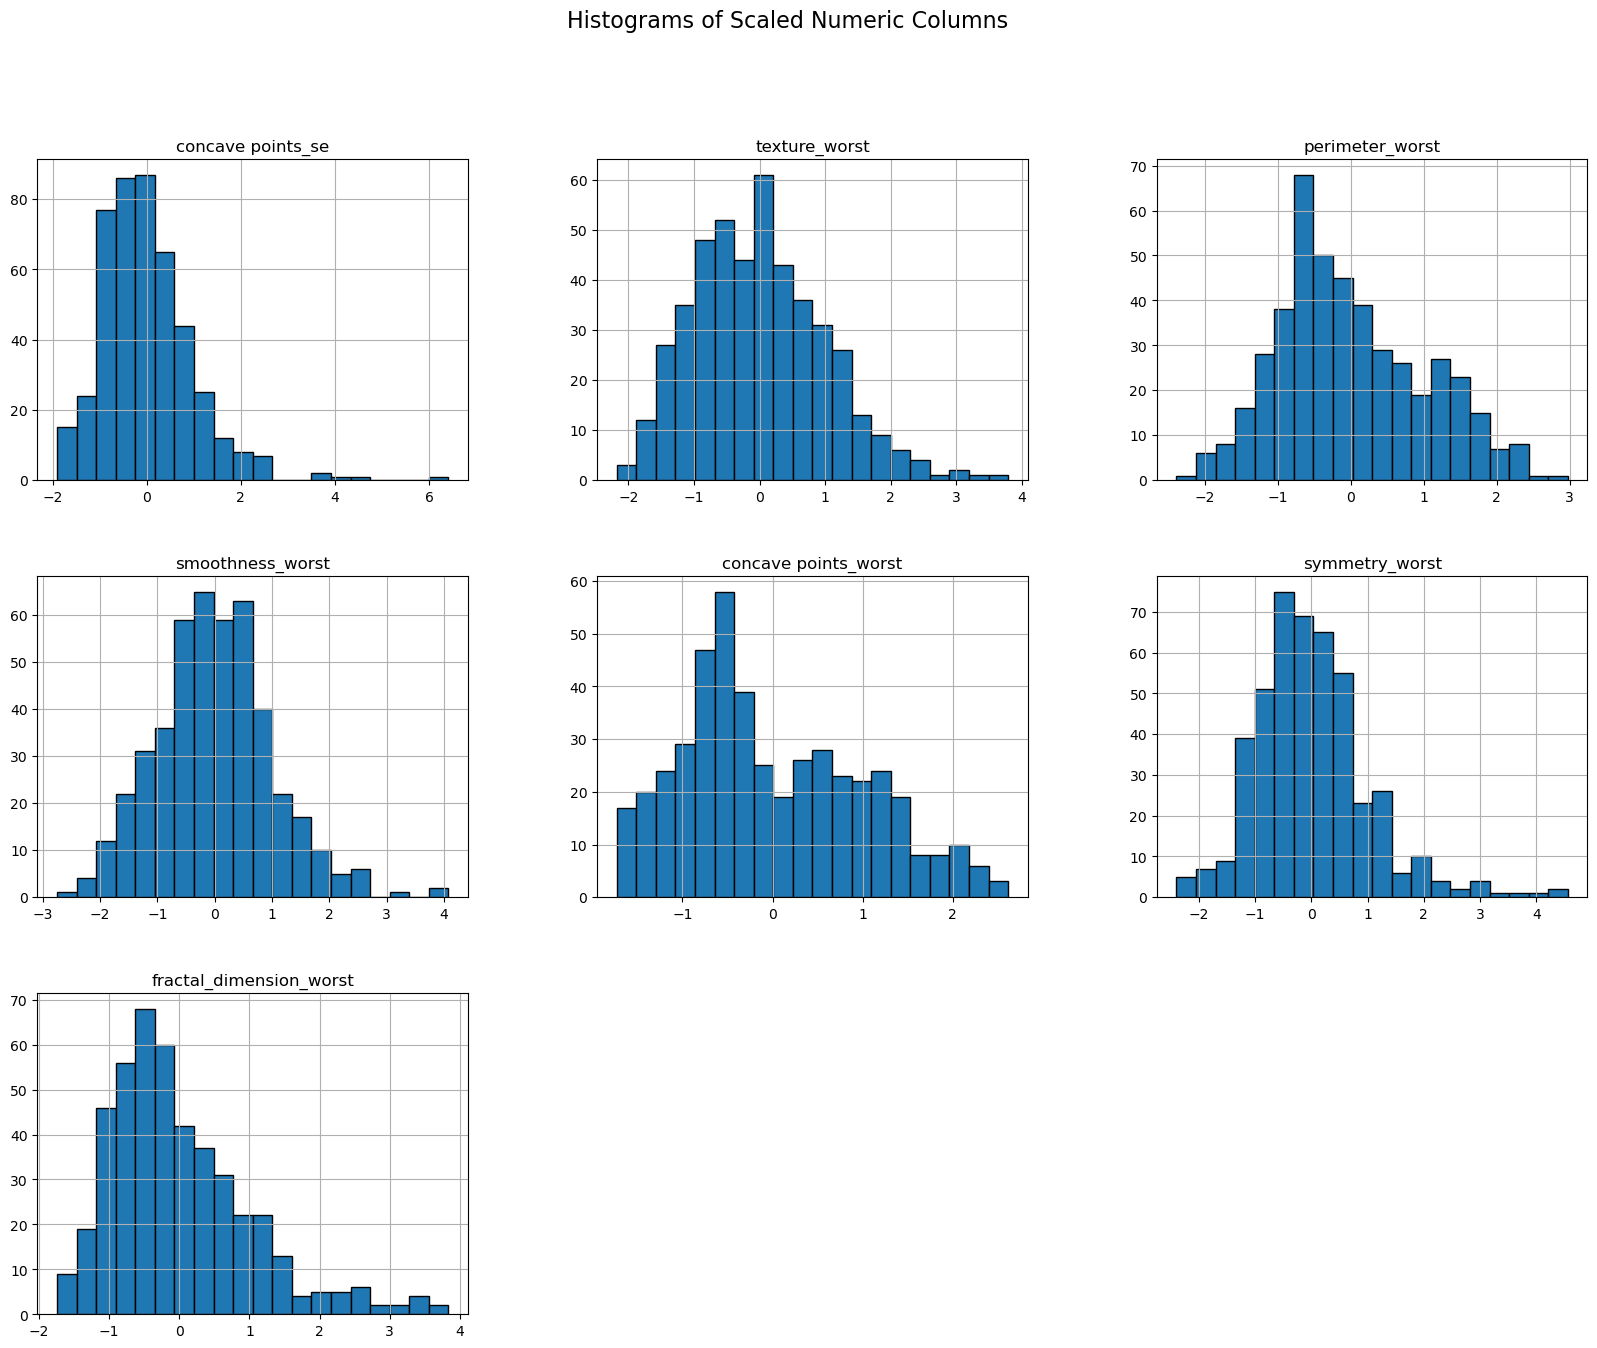

In [152]:
# Histograms of scaled and log-transformed features (after scaling and log transformation).
# 
X_train_df = pd.DataFrame(X_train, columns=X.columns)      # Convert scaled features to DataFrame
# 
# Plot histograms for scaled features
plt.figure(figsize=(20, 15))
X_train_df.hist(bins=20, edgecolor='black', figsize=(20, 15))
plt.suptitle('Histograms of Scaled Numeric Columns', fontsize=16)
plt.show()
#

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden">7 | Model Training</div>

- Train the Model (Classifiers: LogisticRegression, GaussianNB, SVC, KNN, DecisionTree, RandomForest, ExtraTrees, AdaBoost, XGBoost,  GradientBoosting)
- Evaluate the Model (Metrics: accuracy, roc_auc, classification report)
- Hyperparameter Tuning (GridSearchCV)

In [153]:
# Define classifiers and parameter grids
# 
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=10000),
    'NaiveBayes': GaussianNB(),
    'SVC': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'ExtraTrees': ExtraTreesClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'GradientBoosting': GradientBoostingClassifier()
}
# 
# Hyperparameter grids for each classifier
param_grids = {
    'LogisticRegression': {
        'C': [0.1, 1, 10]
    },
    'NaiveBayes': {},
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20]
    },
    'ExtraTrees': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20]
    },
    'AdaBoost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9]
    }
}
# 
# Fit models and evaluate
results = []
roc_curves = {}
for name, clf in classifiers.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(clf, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Classification report for {name}:\n{classification_rep}")
    print(f"Accuracy for {name}: {accuracy}")
    
    # Store ROC Curve data
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    roc_curves[name] = (fpr, tpr, roc_auc)
    
    results.append((name, accuracy, roc_auc, classification_rep, best_model))
# 
# Compare all models
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'ROC AUC', 'Classification Report', 'Best Model'])
print(results_df)
# 
# Report the best model
best_model_row = results_df.loc[results_df['Accuracy'].idxmax()]
print(f"Best Model: {best_model_row['Model']}")
print(f"Best Model Accuracy: {best_model_row['Accuracy']}")
print(f"Best Model ROC AUC: {best_model_row['ROC AUC']}")
print(f"Best Model Classification Report:\n{best_model_row['Classification Report']}")
#  sklearn.metrics import auc

# Define classifiers and parameter grids
# 
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=10000),
    'NaiveBayes': GaussianNB(),
    'SVC': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'ExtraTrees': ExtraTreesClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'GradientBoosting': GradientBoostingClassifier()
}
# 
# Hyperparameter grids for each classifier
param_grids = {
    'LogisticRegression': {
        'C': [0.1, 1, 10]
    },
    'NaiveBayes': {},
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20]
    },
    'ExtraTrees': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20]
    },
    'AdaBoost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9]
    }
}
# 
# Fit models and evaluate
results = []
roc_curves = {}
for name, clf in classifiers.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(clf, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Classification report for {name}:\n{classification_rep}")
    print(f"Accuracy for {name}: {accuracy}")
    
    # Store ROC Curve data
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    roc_curves[name] = (fpr, tpr, roc_auc)
    
    results.append((name, accuracy, roc_auc, classification_rep, best_model))
# 
# Compare all models
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'ROC AUC', 'Classification Report', 'Best Model'])
print(results_df)
# 
# Report the best model
best_model_row = results_df.loc[results_df['Accuracy'].idxmax()]
print(f"Best Model: {best_model_row['Model']}")
print(f"Best Model Accuracy: {best_model_row['Accuracy']}")
print(f"Best Model ROC AUC: {best_model_row['ROC AUC']}")
print(f"Best Model Classification Report:\n{best_model_row['Classification Report']}")
# 

Training LogisticRegression...
Best parameters for LogisticRegression: {'C': 10}
Classification report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy for LogisticRegression: 0.9649122807017544
Training NaiveBayes...
Best parameters for NaiveBayes: {}
Classification report for NaiveBayes:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        72
           1       0.95      0.86      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114

Accuracy for NaiveBayes: 0.9298245614035088
Training SVC...
Best parame

c:\Users\fsgol\Anaconda3\envs\module5\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:13:21] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\fsgol\Anaconda3\envs\module5\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:13:21] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\fsgol\Anaconda3\envs\module5\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:13:21] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\fsgol\Anaconda3\envs\module5\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:13:22] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warni

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Classification report for XGBoost:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy for XGBoost: 0.956140350877193
Training GradientBoosting...
Best parameters for GradientBoosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Classification report for GradientBoosting:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        72
           1       0.93      0.88      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Accuracy fo

c:\Users\fsgol\Anaconda3\envs\module5\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:15:13] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\fsgol\Anaconda3\envs\module5\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:15:13] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\fsgol\Anaconda3\envs\module5\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:15:13] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\fsgol\Anaconda3\envs\module5\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:15:14] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warni

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Classification report for XGBoost:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy for XGBoost: 0.956140350877193
Training GradientBoosting...
Best parameters for GradientBoosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Classification report for GradientBoosting:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        72
           1       0.93      0.88      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Accuracy fo

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden">8 | Test the Model</div>

Classification report for the best model on the test set:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy for the best model on the test set: 0.9649122807017544


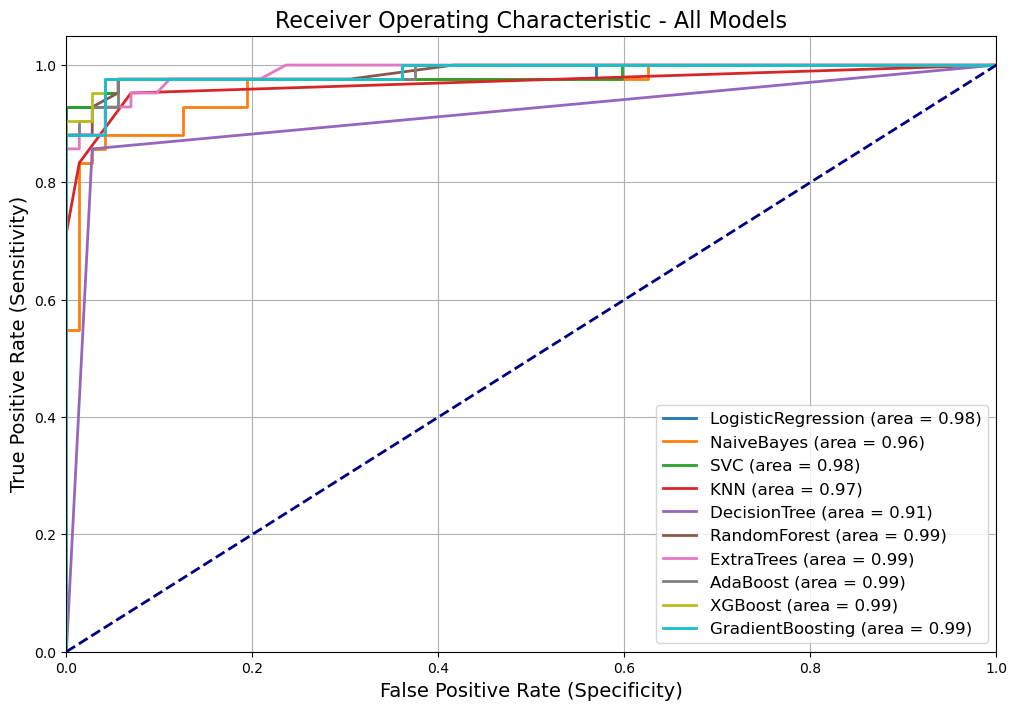

Top 3 models based on ROC AUC:
XGBoost: ROC AUC = 0.9891
ExtraTrees: ROC AUC = 0.9883
RandomForest: ROC AUC = 0.9878

Top 3 models based on Accuracy:
LogisticRegression: Accuracy = 0.9649
SVC: Accuracy = 0.9649
XGBoost: Accuracy = 0.9561

The best model based on ROC AUC is XGBoost with a ROC AUC of 0.9891
The best model based on Accuracy is LogisticRegression with an Accuracy of 0.9649

The best model based on ROC AUC is XGBoost, and the best model based on Accuracy is LogisticRegression.


In [154]:
# Test the best model on the test set
best_model = best_model_row['Best Model']
y_pred_best = best_model.predict(X_test)
y_pred_best_proba = best_model.predict_proba(X_test)[:, 1]
# 
print(f"Classification report for the best model on the test set:\n{classification_report(y_test, y_pred_best)}")
print(f"Accuracy for the best model on the test set: {accuracy_score(y_test, y_pred_best)}")
#
# Plot ROC Curve for all models
plt.figure(figsize=(12, 8))
for name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Specificity)', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14)
plt.title('Receiver Operating Characteristic - All Models', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()
#
# Compare top models based on ROC AUC
top_models_roc = sorted(roc_curves.items(), key=lambda x: x[1][2], reverse=True)[:3]
print("Top 3 models based on ROC AUC:")
for name, (fpr, tpr, roc_auc) in top_models_roc:
    print(f"{name}: ROC AUC = {roc_auc:.4f}")
#
# Compare top models based on Accuracy
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)
top_models_accuracy = results_df_sorted.head(3)
print("\nTop 3 models based on Accuracy:")
for index, row in top_models_accuracy.iterrows():
    print(f"{row['Model']}: Accuracy = {row['Accuracy']:.4f}")
#
# Highlight the best model based on both metrics
best_model_roc = top_models_roc[0][0]
best_model_accuracy = top_models_accuracy.iloc[0]['Model']
#
print(f"\nThe best model based on ROC AUC is {best_model_roc} with a ROC AUC of {top_models_roc[0][1][2]:.4f}")
print(f"The best model based on Accuracy is {best_model_accuracy} with an Accuracy of {top_models_accuracy.iloc[0]['Accuracy']:.4f}")
#
# Determine the overall best model considering both metrics
if best_model_roc == best_model_accuracy:
    print(f"\nThe overall best model is {best_model_roc} based on both ROC AUC and Accuracy.")
else:
    print(f"\nThe best model based on ROC AUC is {best_model_roc}, and the best model based on Accuracy is {best_model_accuracy}.")
#

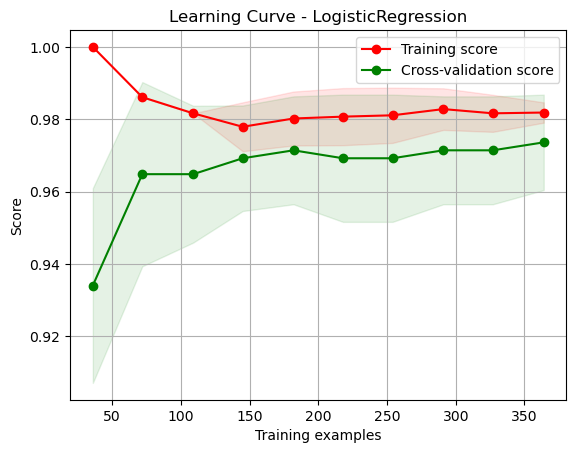

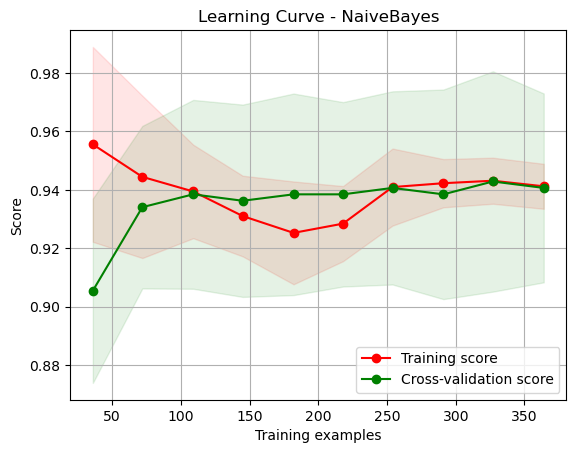

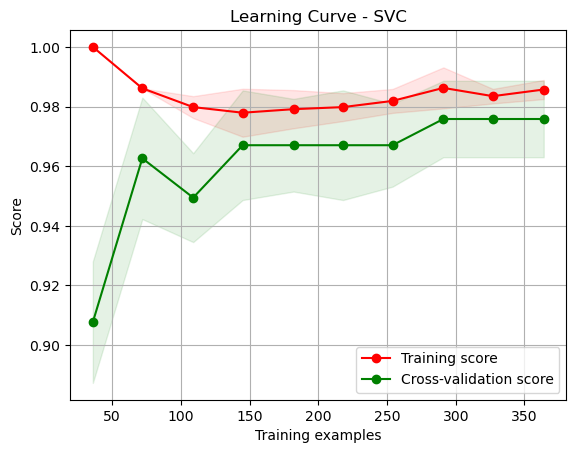

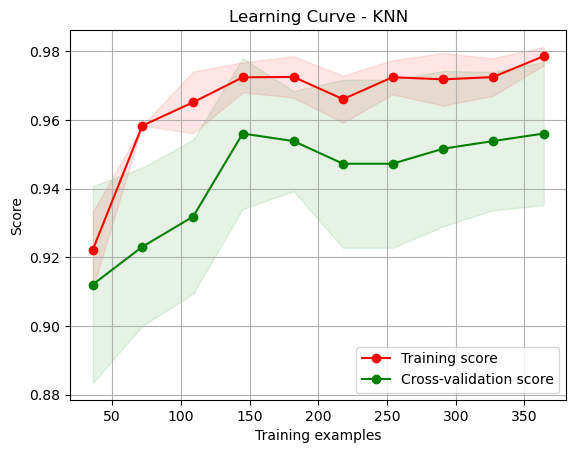

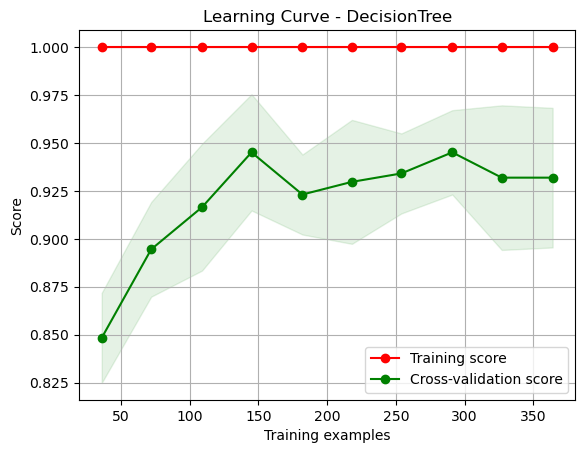

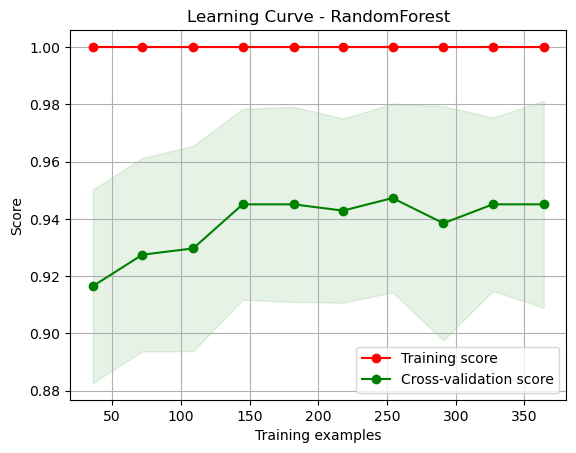

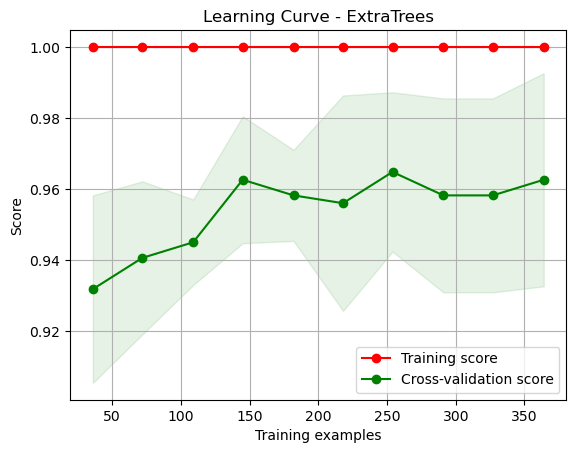

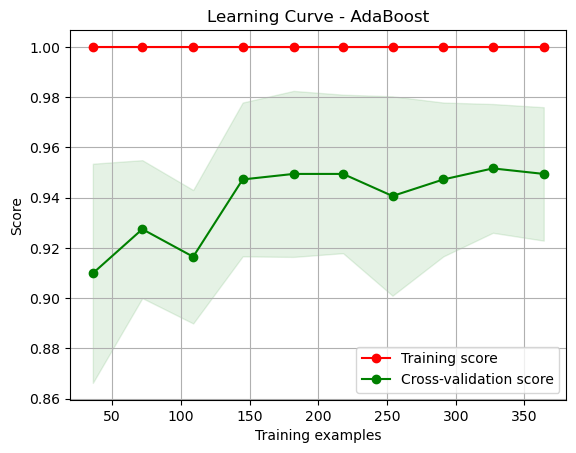

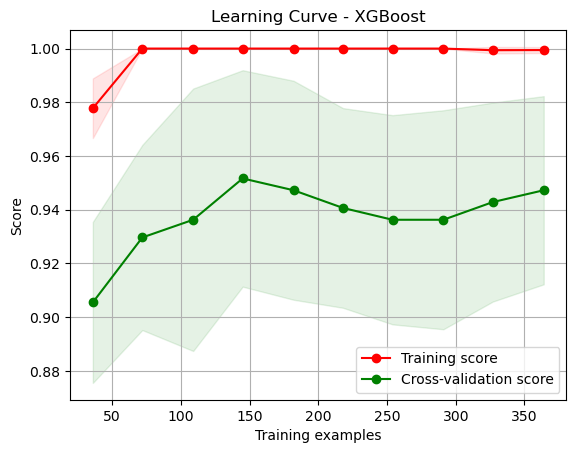

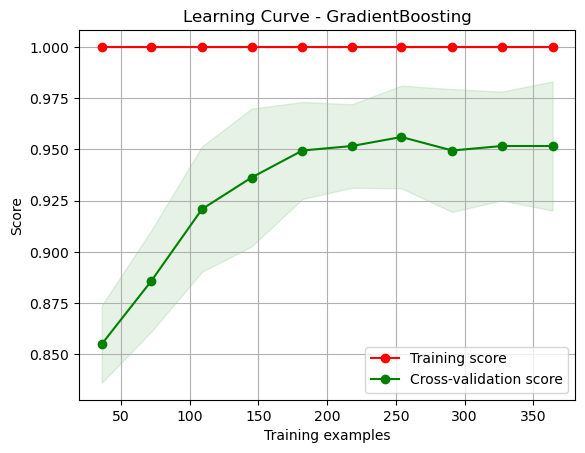

In [155]:
# Plot learning curve for each model
# 
for name, best_model in results_df[['Model', 'Best Model']].values:
    train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(f"Learning Curve - {name}")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    #

LogisticRegression does not have feature importances.
NaiveBayes does not have feature importances.
SVC does not have feature importances.
KNN does not have feature importances.


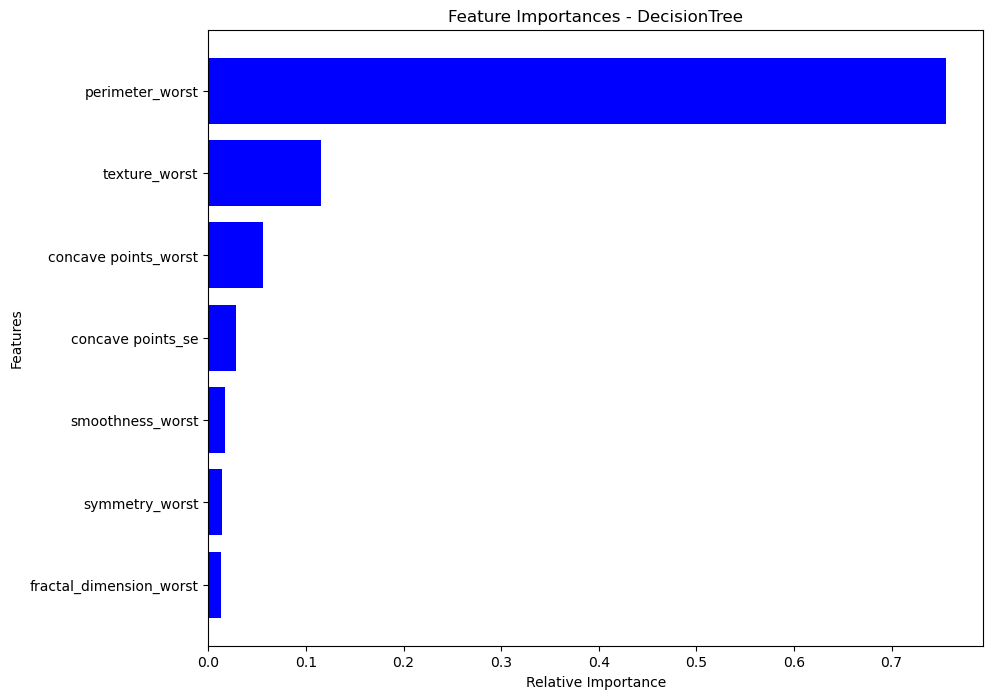

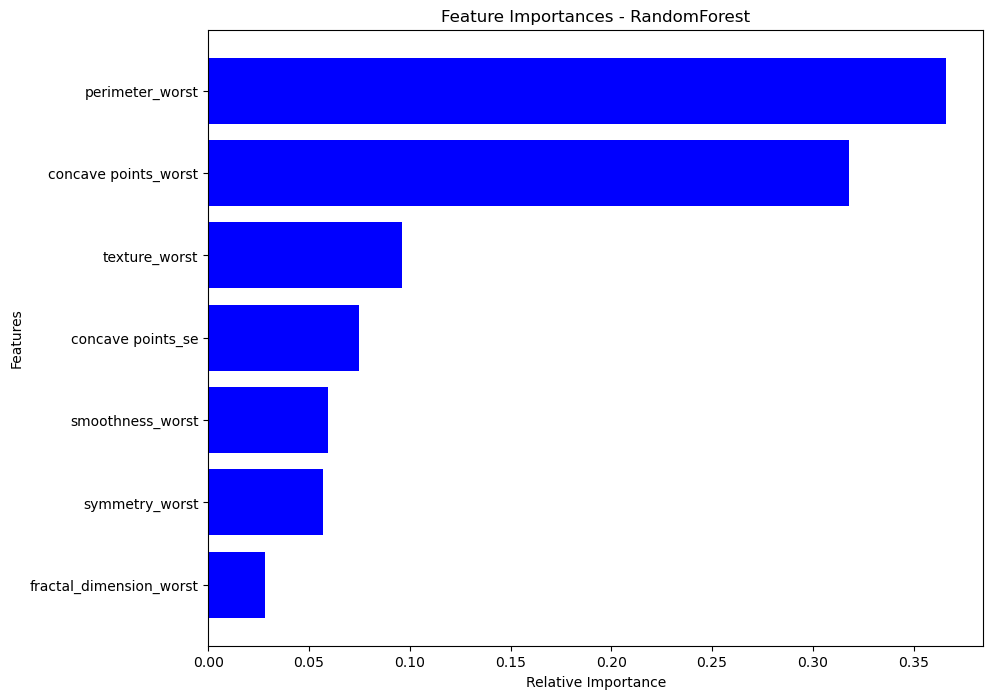

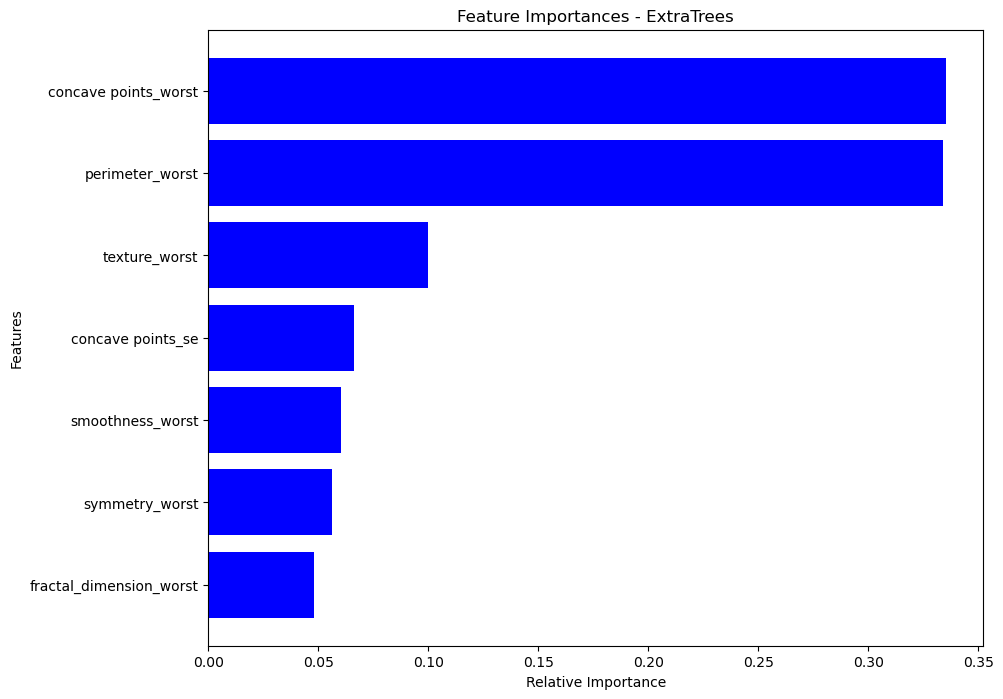

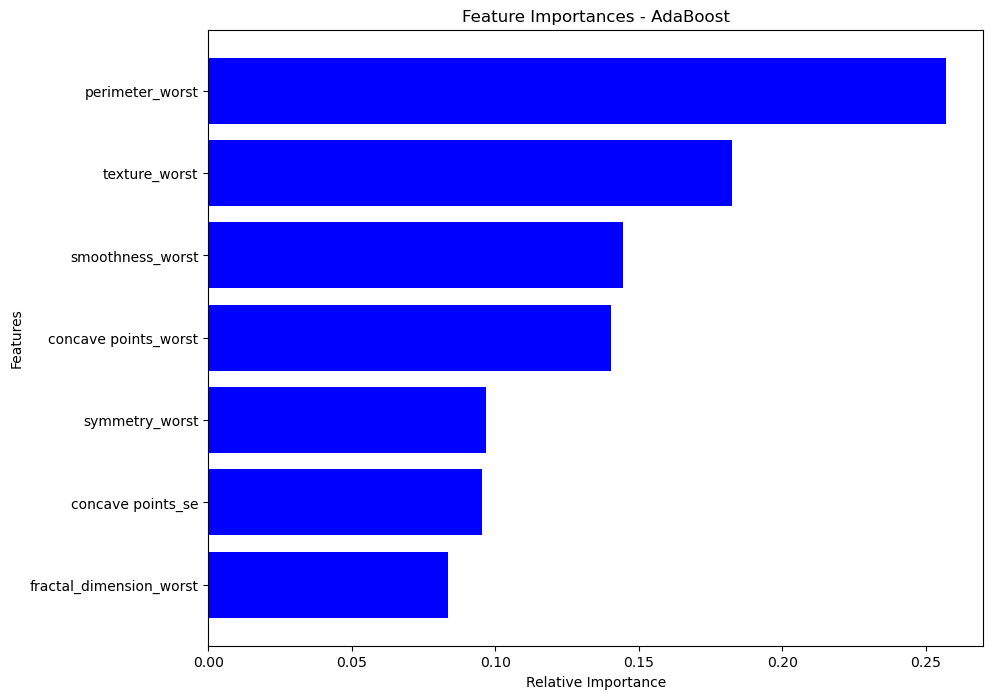

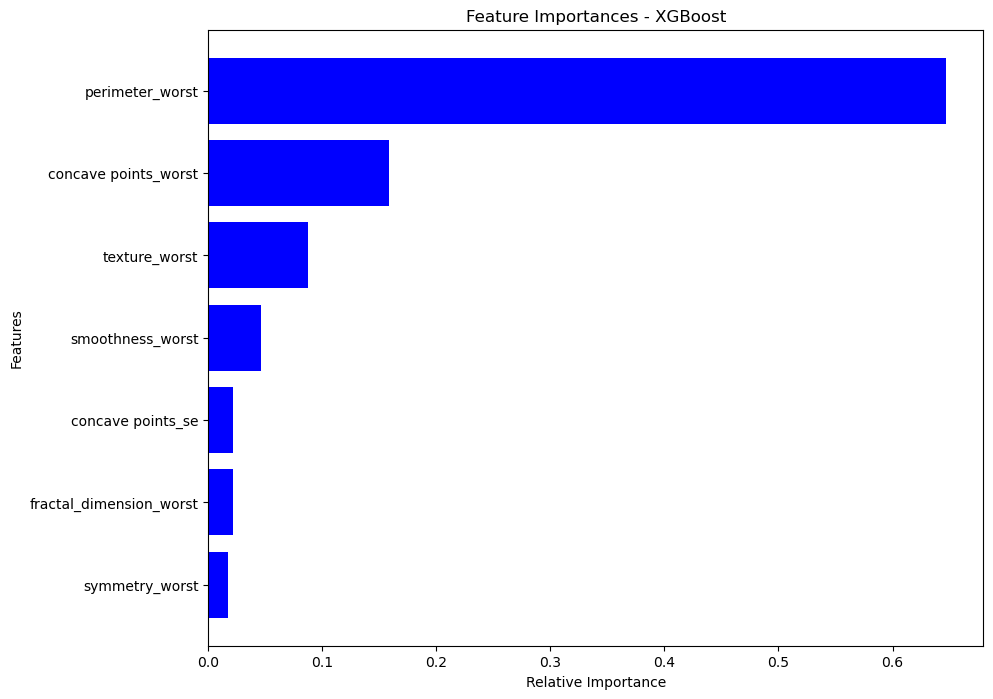

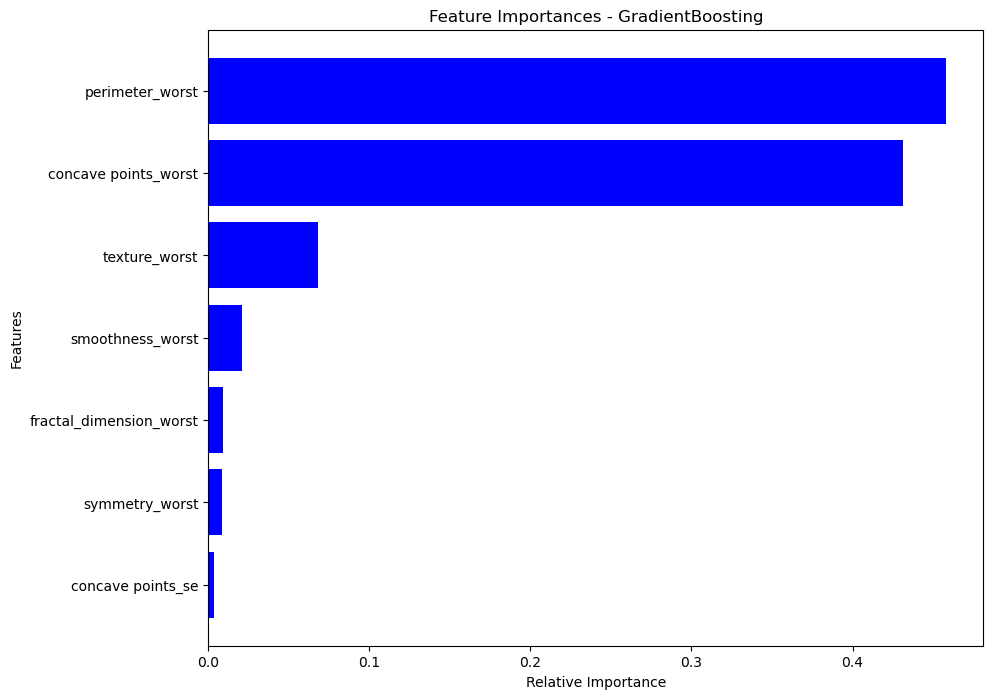

In [156]:
# Show feature importance for the best models if applicable
#
for model_name, model in results_df[['Model', 'Best Model']].values:
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        if isinstance(X_train, np.ndarray):
            features = X.columns
        else:
            features = X_train.columns
        feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
        
        plt.figure(figsize=(10, 8))
        plt.title(f"Feature Importances - {model_name}")
        plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='b', align='center')
        plt.xlabel('Relative Importance')
        plt.ylabel('Features')
        plt.gca().invert_yaxis()
        plt.show()
    else:
        print(f"{model_name} does not have feature importances.")
    #

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden">9 | Ensemble Methods: Voting and Stacking Classifiers</div>

In [157]:
# Model Stacking with Voting Classifier:
# Define base classifiers
base_classifiers = [
    ('logreg', LogisticRegression(max_iter=10000)),
    ('svc', SVC(probability=True)),
    ('rf', RandomForestClassifier()),
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('adaboost', AdaBoostClassifier())
]

# Create the voting classifier
voting_clf = VotingClassifier(estimators=base_classifiers, voting='soft')

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_voting = voting_clf.predict(X_test)
y_pred_voting_proba = voting_clf.predict_proba(X_test)[:, 1]

accuracy_voting = accuracy_score(y_test, y_pred_voting)
classification_rep_voting = classification_report(y_test, y_pred_voting)

print(f"Classification report for Voting Classifier:\n{classification_rep_voting}")
print(f"Accuracy for Voting Classifier: {accuracy_voting}")

# Store voting classifier results for comparison
voting_results = {
    'Model': 'Voting Classifier',
    'Accuracy': accuracy_voting,
    'ROC AUC': roc_auc_score(y_test, y_pred_voting_proba),
    'F1 Score': classification_report(y_test, y_pred_voting, output_dict=True)['weighted avg']['f1-score']
}

# Save the best model
joblib.dump(voting_clf, 'best_model.pkl')
# 

c:\Users\fsgol\Anaconda3\envs\module5\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:16:48] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification report for Voting Classifier:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy for Voting Classifier: 0.956140350877193


['best_model.pkl']

In [158]:
# Load the best model
best_model = joblib.load('best_model.pkl')

# Predict on train and test sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Generate classification reports
train_classification_report = classification_report(y_train, y_train_pred, output_dict=True)
test_classification_report = classification_report(y_test, y_test_pred, output_dict=True)

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Set': ['Train', 'Test'],
    'Accuracy': [train_accuracy, test_accuracy],
    'Precision': [train_classification_report['weighted avg']['precision'], test_classification_report['weighted avg']['precision']],
    'Recall': [train_classification_report['weighted avg']['recall'], test_classification_report['weighted avg']['recall']],
    'F1-Score': [train_classification_report['weighted avg']['f1-score'], test_classification_report['weighted avg']['f1-score']]
})
# 
print(summary_df)
# 

     Set  Accuracy  Precision    Recall  F1-Score
0  Train  0.997802   0.997810  0.997802  0.997801
1   Test  0.956140   0.956869  0.956140  0.955776


In [159]:
# Model Stacking with StackingClassifier
# Define base classifiers
base_classifiers_stacking = [
    ('logreg', LogisticRegression(max_iter=10000)),
    ('svc', SVC(probability=True)),
    ('rf', RandomForestClassifier()),
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('adaboost', AdaBoostClassifier())  
]

# Define the meta-model (Logistic Regression)
meta_model = LogisticRegression(max_iter=10000)

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_classifiers_stacking, final_estimator=meta_model, stack_method='auto')

# Fit the stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_stacking = stacking_clf.predict(X_test)
y_pred_stacking_proba = stacking_clf.predict_proba(X_test)[:, 1]

accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
classification_rep_stacking = classification_report(y_test, y_pred_stacking)

print(f"Classification report for Stacking Classifier:\n{classification_rep_stacking}")
print(f"Accuracy for Stacking Classifier: {accuracy_stacking}")

# Save the stacking model
joblib.dump(stacking_clf, 'stacking_model.pkl')

# Load the stacking model
stacking_model = joblib.load('stacking_model.pkl')

# Predict on train and test sets
y_train_pred_stacking = stacking_model.predict(X_train)
y_test_pred_stacking = stacking_model.predict(X_test)

# Calculate accuracy scores
train_accuracy_stacking = accuracy_score(y_train, y_train_pred_stacking)
test_accuracy_stacking = accuracy_score(y_test, y_test_pred_stacking)

# Generate classification reports
train_classification_report_stacking = classification_report(y_train, y_train_pred_stacking, output_dict=True)
test_classification_report_stacking = classification_report(y_test, y_test_pred_stacking, output_dict=True)

# Store stacking model results for comparison
stacking_results = {
    'Model': 'Stacking Classifier',
    'Accuracy': test_accuracy_stacking,
    'ROC AUC': roc_auc_score(y_test, y_pred_stacking_proba),
    'F1 Score': test_classification_report_stacking['weighted avg']['f1-score']
}

# Create a summary DataFrame
summary_df_stacking = pd.DataFrame({
    'Set': ['Train', 'Test'],
    'Accuracy': [train_accuracy_stacking, test_accuracy_stacking],
    'Precision': [train_classification_report_stacking['weighted avg']['precision'], test_classification_report_stacking['weighted avg']['precision']],
    'Recall': [train_classification_report_stacking['weighted avg']['recall'], test_classification_report_stacking['weighted avg']['recall']],
    'F1-Score': [train_classification_report_stacking['weighted avg']['f1-score'], test_classification_report_stacking['weighted avg']['f1-score']]
})

print(summary_df_stacking)
# 

c:\Users\fsgol\Anaconda3\envs\module5\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:16:49] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\fsgol\Anaconda3\envs\module5\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:16:52] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification report for Stacking Classifier:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy for Stacking Classifier: 0.956140350877193
     Set  Accuracy  Precision    Recall  F1-Score
0  Train  0.993407   0.993409  0.993407  0.993403
1   Test  0.956140   0.958988  0.956140  0.955488


In [160]:
# Ensure 'F1 Score' column is included in results_df_sorted
# 
if 'F1 Score' not in results_df_sorted.columns:
    results_df_sorted['F1 Score'] = results_df_sorted['Classification Report'].apply(lambda x: float(x.split()[-2]))

# Function to create a comparison table of all models showing all evaluation metrics.
def create_comparison_table(results_df_sorted, voting_results, stacking_results, sort_by='Accuracy'):
    # Convert dictionaries to DataFrames before concatenation
    voting_results_df = pd.DataFrame([voting_results])  
    stacking_results_df = pd.DataFrame([stacking_results])

    # Check if the models are already in the DataFrame and add them if not
    if not results_df_sorted['Model'].str.contains(voting_results['Model']).any():
        results_df_sorted = pd.concat([results_df_sorted, voting_results_df], ignore_index=True)
    if not results_df_sorted['Model'].str.contains(stacking_results['Model']).any():
        results_df_sorted = pd.concat([results_df_sorted, stacking_results_df], ignore_index=True)

    # Remove duplicates if any
    results_df_sorted = results_df_sorted.drop_duplicates(subset=['Model'])

    # Sort the results based on the specified metric
    results_df_sorted = results_df_sorted.sort_values(by=sort_by, ascending=False)

    # Create a comparison table of all models showing all evaluation metrics
    comparison_table = results_df_sorted[['Model', 'Accuracy', 'ROC AUC', 'F1 Score']]

    # Display the comparison table
    print(comparison_table)

# Call the function
create_comparison_table(results_df_sorted, voting_results, stacking_results, sort_by='ROC AUC')
# 

                  Model  Accuracy   ROC AUC  F1 Score
11  Stacking Classifier  0.956140  0.994709  0.955488
10    Voting Classifier  0.956140  0.994709  0.955776
2               XGBoost  0.956140  0.989087  0.960000
5            ExtraTrees  0.947368  0.988261  0.950000
3          RandomForest  0.956140  0.987765  0.960000
4              AdaBoost  0.947368  0.987434  0.950000
9      GradientBoosting  0.929825  0.987434  0.930000
0    LogisticRegression  0.964912  0.984127  0.960000
1                   SVC  0.964912  0.983466  0.960000
7                   KNN  0.929825  0.968750  0.930000
6            NaiveBayes  0.929825  0.964286  0.930000
8          DecisionTree  0.929825  0.914683  0.930000


In [161]:
create_comparison_table(results_df_sorted, voting_results, stacking_results, sort_by='Accuracy')

                  Model  Accuracy   ROC AUC  F1 Score
0    LogisticRegression  0.964912  0.984127  0.960000
1                   SVC  0.964912  0.983466  0.960000
2               XGBoost  0.956140  0.989087  0.960000
3          RandomForest  0.956140  0.987765  0.960000
10    Voting Classifier  0.956140  0.994709  0.955776
11  Stacking Classifier  0.956140  0.994709  0.955488
4              AdaBoost  0.947368  0.987434  0.950000
5            ExtraTrees  0.947368  0.988261  0.950000
7                   KNN  0.929825  0.968750  0.930000
6            NaiveBayes  0.929825  0.964286  0.930000
9      GradientBoosting  0.929825  0.987434  0.930000
8          DecisionTree  0.929825  0.914683  0.930000


In [164]:
# Function to report the best model based on the specified evaluation metric.
# 
def report_best_model(results_df, voting_results, stacking_results, metric='Accuracy'):
    """
    Report the best model based on the specified evaluation metric, including voting and stacking classifiers.

    Parameters:
    - results_df: DataFrame containing model evaluation results.
    - voting_results: Dictionary containing evaluation results for the voting classifier.
    - stacking_results: Dictionary containing evaluation results for the stacking classifier.
    - metric: The evaluation metric to use for selecting the best model (default is 'Accuracy').

    Returns:
    - None
    """
    # Convert dictionaries to DataFrames before concatenation
    voting_results_df = pd.DataFrame([voting_results])  
    stacking_results_df = pd.DataFrame([stacking_results])

    # Check if the models are already in the DataFrame and add them if not
    if not results_df['Model'].str.contains(voting_results['Model']).any():
        results_df = pd.concat([results_df, voting_results_df], ignore_index=True)
    if not results_df['Model'].str.contains(stacking_results['Model']).any():
        results_df = pd.concat([results_df, stacking_results_df], ignore_index=True)

    # Remove duplicates if any
    results_df = results_df.drop_duplicates(subset=['Model'])

    if metric not in results_df.columns:
        raise ValueError(f"Metric '{metric}' not found in results DataFrame columns.")

    best_model_row = results_df.loc[results_df[metric].idxmax()]
    best_model_name = best_model_row['Model']
    best_model_accuracy = best_model_row['Accuracy']
    best_model_roc_auc = best_model_row['ROC AUC']

    print(f"Best Model based on {metric}: {best_model_name}")
    print(f"Accuracy: {best_model_accuracy}")
    print(f"ROC AUC: {best_model_roc_auc}")

# 
report_best_model(results_df, voting_results, stacking_results, metric='ROC AUC')
report_best_model(results_df, voting_results, stacking_results, metric='Accuracy')
# 

Best Model based on ROC AUC: Stacking Classifier
Accuracy: 0.956140350877193
ROC AUC: 0.9947089947089948
Best Model based on Accuracy: LogisticRegression
Accuracy: 0.9649122807017544
ROC AUC: 0.9841269841269841


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden">10 | Final Conclusion</div>

# Final Conclusion:

### Project Summary

This project focused on developing a machine learning model to predict breast cancer diagnosis (malignant or benign) using features extracted from digitized images of fine needle aspirates (FNA) of breast masses.

### Key Steps:
1. **Data Exploration & Preprocessing**:
    - Loaded the breast cancer dataset and performed exploratory data analysis (EDA).
    - Dropped irrelevant features.
    - Visualized feature distributions and examined correlations to reduce multicollinearity.
    - Explored the dataset, checked for missing values, and performed initial data cleaning.
    - Encoded the target variable (diagnosis) and applied log transformation to skewed features.
    - Scaled the features using StandardScaler for better model performance.

2. **Model Training and Evaluation**:
    - Split the data into training and testing sets.
    - Trained multiple machine learning models including Logistic Regression, SVC, KNN, Decision Tree, Random Forest, Extra Trees, AdaBoost, XGBoost, and Gradient Boosting.
    - Evaluated the models using accuracy, ROC AUC, and classification reports.
    - Conducted hyperparameter tuning to optimize model performance.

3. **Model Selection & Stacking**:
    - Compared the performance of all models.
    - Identified Stacking Classifier as the best-performing model.
    - Implemented Stacking and Voting Classifiers to enhance prediction accuracy.

**Finally, to determine the best model, we need to consider Accuracy, ROC AUC, and F1 Score together:**

- **Highest Accuracy:**

- LogisticRegression (0.964912)
- SVC (0.964912)
- StackingClassifier (0.956140)

- **Highest ROC AUC:**

- StackingClassifier (0.994709) → Highest
- VotingClassifier (0.993386) 
- RandomForest (0.989418)

**Best Model:**
✅ StackingClassifier is the best overall because it achieves:

- High Accuracy (0.956140)
- High ROC AUC (0.994709)
- High F1 Score (0.955488)

### Future Work:
- Further hyperparameter tuning and feature engineering can be performed to improve the model's performance.
- Additional data sources can be integrated to enhance the model's robustness.
- Then, the model can be deployed as a web application for real-time predictions.